
=== Rolling Day 2024-12-01 ===
  train_cutoff=2024-07-01  val_cutoff=2024-11-30
  Forecast next 30 days from 2024-12-01 w/ noise => more volatility
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-01_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-01_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-01_V1.pt
[PyTorch] Loading CNN from ./best_CNN_2024-12-01_V1.pt
[PyTorch] Loading Transformer from ./best_Transformer_2024-12-01_V1.pt
[PyTorch] Loading N-BEATS from ./best_N-BEATS_2024-12-01_V1.pt
[PyTorch] Loading N-HITS from ./best_N-HITS_2024-12-01_V1.pt
[sklearn] Loading SVM => ./best_SVM_2024-12-01_V1.pkl
[sklearn] Loading Boost => ./best_Boost_2024-12-01_V1.pkl

=== Rolling Day 2024-12-02 ===
  train_cutoff=2024-07-02  val_cutoff=2024-12-01
  Forecast next 30 days from 2024-12-02 w/ noise => more volatility
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-02_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-02_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-02_V1.pt
[PyTor

/tmp/ipykernel_1813759/3307433237.py:385: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
/tmp/ipykernel_1813759/3307433237.py:404: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()


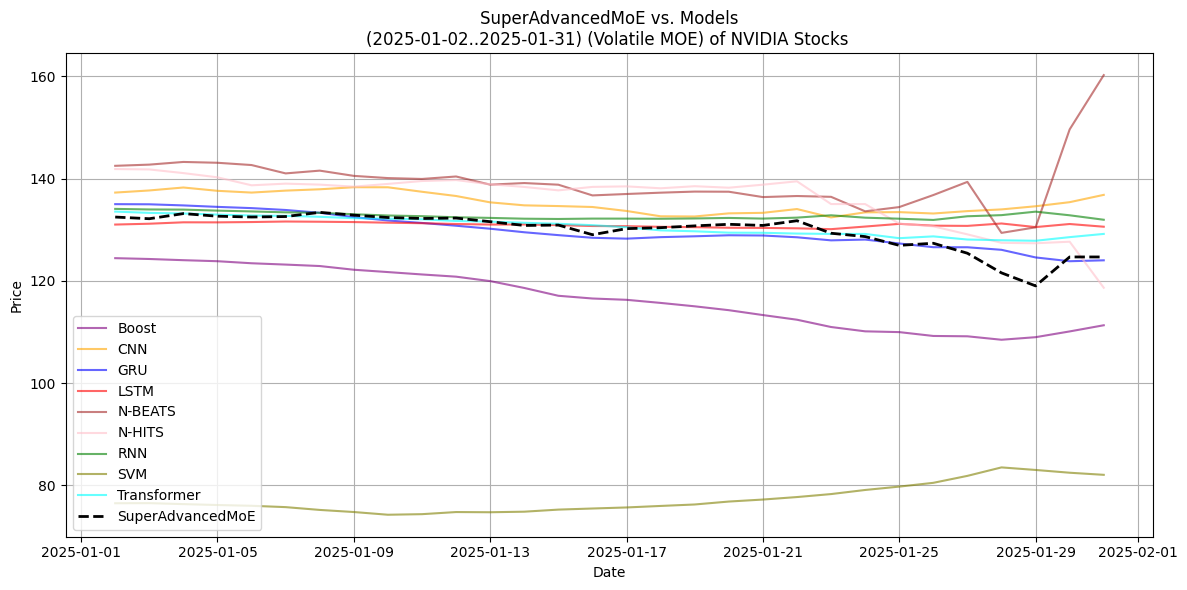

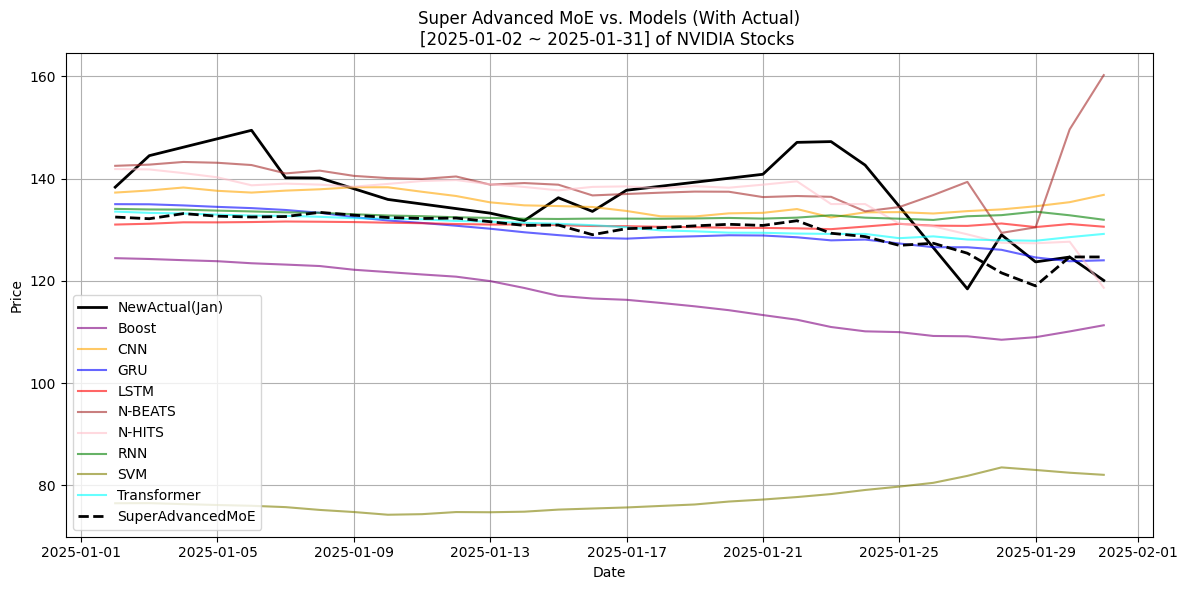

/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: 

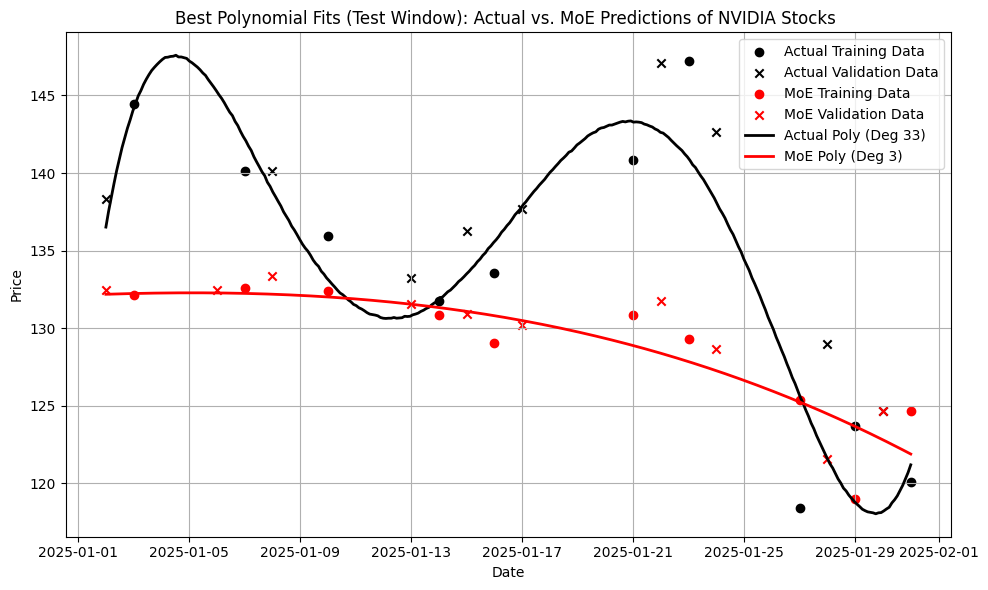


=== Best Polynomial Fitting Results ===
[Actual] => Degree=33, Val MSE=17.233725
     y = 7.1944e-129*x^33+1.3536e-125*x^32-1.2225e-120*x^31-3.7289e-116*x^30-7.6074e-112*x^29-1.2299e-107*x^28-1.5183e-103*x^27-8.2818e-100*x^26+2.5818e-95*x^25+1.2635e-90*x^24+3.5130e-86*x^23+8.2915e-82*x^22+1.6918e-77*x^21+3.0931e-73*x^20+4.9310e-69*x^19+6.5483e-65*x^18+4.5224e-61*x^17-9.3786e-57*x^16-5.1368e-52*x^15-1.6363e-47*x^14-4.1074e-43*x^13-9.0197e-39*x^12-1.7963e-34*x^11-3.1334e-30*x^10-4.4162e-26*x^9-3.8617e-22*x^8+4.7647e-18*x^7+3.5800e-13*x^6+1.1597e-08*x^5+2.8903e-04*x^4+5.8047e+00*x^3+7.7709e+04*x^2-3.4690e+08*x-7.3692e+13

[MoE] => Degree=3, Val MSE=2.701464
     y = -2.0292e-04*x^3+1.2221e+01*x^2-2.4536e+05*x+1.6420e+09

=== Derivative for Actual (Degree 33 => 32) ===
   d/dx of Actual = 2.3742e-127*x^32+4.3316e-124*x^31-3.7897e-119*x^30-1.1187e-114*x^29-2.2062e-110*x^28-3.4438e-106*x^27-4.0994e-102*x^26-2.1533e-98*x^25+6.4545e-94*x^24+3.0323e-89*x^23+8.0799e-85*x^22+1.8241e-80*x^21+3.55

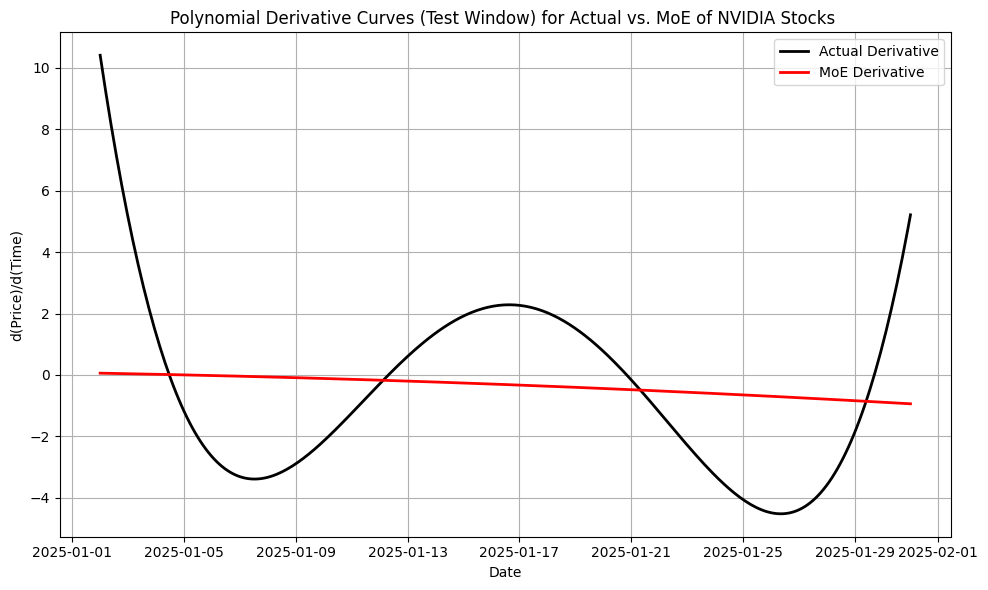


All done with MoE + polynomial fittings for both Actual and MoE!


In [1]:
####################################################
# SUPER ADVANCED MOE SCRIPT (WITH ACTUAL & POLYNOMIALS)
####################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import joblib

from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

# Global seeds & device
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

BEST_MODELS_DIR = "."   # Where .pt/.pkl model files are stored
features = ["Price","Open","High","Low"]
WINDOW_SIZE = 35

############################################
# 1) Model Definitions & Loading
############################################
class BaseModel(nn.Module):
    def __init__(self, model_type="LSTM", window_width=35):
        super().__init__()
        self.model_type = model_type

        if model_type == "CNN":
            self.conv1 = nn.Conv1d(4, 64, 3)
            self.conv2 = nn.Conv1d(64, 128, 3)
            with torch.no_grad():
                dummy = torch.zeros(1, 4, window_width)
                outdummy = self.conv2(F.relu(self.conv1(dummy)))
                conv_output_size = outdummy.shape[1]*outdummy.shape[2]
            self.fc = nn.Linear(conv_output_size, 4)

        elif model_type == "LSTM":
            self.rnn = nn.LSTM(4, 128, num_layers=2, batch_first=True, dropout=0.05)
            self.fc = nn.Linear(128, 4)

        elif model_type == "GRU":
            self.rnn = nn.GRU(4, 128, num_layers=2, batch_first=True, dropout=0.05)
            self.fc = nn.Linear(128, 4)

        elif model_type == "RNN":
            self.rnn = nn.RNN(4, 128, num_layers=2, nonlinearity="relu", batch_first=True, dropout=0.05)
            self.fc = nn.Linear(128, 4)

        elif model_type == "EnhancedLSTM":
            self.rnn = nn.LSTM(4, 128, num_layers=3, batch_first=True, dropout=0.1)
            self.bn  = nn.BatchNorm1d(128)
            self.dropout = nn.Dropout(0.1)
            self.fc = nn.Linear(128, 4)

        elif model_type == "Transformer":
            self.input_linear = nn.Linear(4, 128)
            enc_layer = nn.TransformerEncoderLayer(d_model=128, nhead=8, dropout=0.05)
            self.transformer_encoder = nn.TransformerEncoder(enc_layer, num_layers=3)
            self.fc = nn.Linear(128,4)

        elif model_type in ["N-BEATS","N-HITS"]:
            self.input_size= window_width*4
            self.blocks= nn.ModuleList([nn.Sequential(
                nn.Linear(self.input_size,128),
                nn.ReLU(),
                nn.Linear(128,128),
                nn.ReLU(),
                nn.Linear(128,4)
            ) for _ in range(3)])
        else:
            raise ValueError(f"Invalid model_type: {model_type}")

    def forward(self, x):
        if self.model_type == "CNN":
            x = x.permute(0,2,1)
            x = F.relu(self.conv1(x))
            x = F.relu(self.conv2(x))
            x = x.view(x.size(0), -1)
            return self.fc(x)

        elif self.model_type in ["LSTM","GRU","RNN"]:
            out, _ = self.rnn(x)
            out = out[:,-1,:]
            return self.fc(out)

        elif self.model_type == "EnhancedLSTM":
            out, _= self.rnn(x)
            out = out[:,-1,:]
            out = self.bn(out)
            out = self.dropout(out)
            return self.fc(out)

        elif self.model_type == "Transformer":
            x = self.input_linear(x)
            x = x.permute(1,0,2)
            x = self.transformer_encoder(x)
            x = x[-1,:,:]
            return self.fc(x)

        elif self.model_type in ["N-BEATS","N-HITS"]:
            xflat = x.reshape(x.size(0), -1)
            forecast = 0
            for block in self.blocks:
                forecast += block(xflat)
            return forecast

        else:
            raise ValueError("Invalid model_type")

class SklearnWrapper:
    def __init__(self, model):
        self.model= model
    def forward(self, x):
        arr= x.cpu().numpy().reshape(1,-1)
        pred= self.model.predict(arr)
        return torch.from_numpy(pred).float().to(x.device)
    def eval(self): pass
    def __call__(self, x):
        return self.forward(x)

def load_torch_model(model_type, window_size, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[PyTorch] Loading {model_type} from {path}")
    net= BaseModel(model_type, window_size).to(device)
    net.load_state_dict(torch.load(path, map_location=device))
    net.eval()
    return net

def load_sklearn_model(model_type, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[sklearn] Loading {model_type} => {path}")
    loaded= joblib.load(path)
    return SklearnWrapper(loaded)

############################################
# 2) Load & Scale Data
############################################
def load_and_scale_data(train_csv="NVIDIA Stock Price History.csv",
                        complete_csv="NVIDIA Stock Price History_Complete.csv"):
    df_train = pd.read_csv(train_csv)
    df_train["Date"] = pd.to_datetime(df_train["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_train.columns:
            df_train.drop(columns=[col], errors="ignore", inplace=True)

    for feat in features:
        if feat not in df_train.columns:
            df_train[feat]= np.nan
        else:
            df_train[feat]= df_train[feat].astype(str).str.replace(",", "", regex=True)
            df_train[feat]= pd.to_numeric(df_train[feat], errors="coerce")

    df_train.sort_values("Date", inplace=True)
    df_train.reset_index(drop=True, inplace=True)

    train_cutoff= pd.to_datetime("2024-07-01")
    val_cutoff  = pd.to_datetime("2024-11-30")
    test_cutoff = pd.to_datetime("2024-12-01")

    df_trn= df_train[df_train["Date"]< train_cutoff].copy()
    df_val= df_train[(df_train["Date"]>= train_cutoff)&(df_train["Date"]<= val_cutoff)].copy()
    df_tst= df_train[df_train["Date"]>= test_cutoff].copy()

    df_trn_nonan= df_trn.dropna(subset=features)
    scaler= MinMaxScaler()
    scaler.fit(df_trn_nonan[features])

    df_trn_scaled= df_trn.copy()
    if not df_trn_nonan.empty:
        df_trn_scaled.loc[df_trn_nonan.index, features]= scaler.transform(df_trn_nonan[features])
    df_val_scaled= df_val.copy()
    val_no_nan= df_val_scaled.dropna(subset=features)
    if not val_no_nan.empty:
        df_val_scaled.loc[val_no_nan.index, features]= scaler.transform(val_no_nan[features])
    df_tst_scaled= df_tst.copy()
    trn_mins= df_trn_nonan[features].min()
    df_tst_filled= df_tst_scaled[features].fillna(trn_mins)
    df_tst_scaled.loc[:, features]= scaler.transform(df_tst_filled)

    df_scaled= pd.concat([df_trn_scaled, df_val_scaled, df_tst_scaled], ignore_index=True)

    # also load complete
    df_complete= pd.read_csv(complete_csv)
    df_complete["Date"]= pd.to_datetime(df_complete["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_complete.columns:
            df_complete.drop(columns=[col], errors="ignore", inplace=True)
    for feat in features:
        df_complete[feat]= df_complete[feat].astype(str).str.replace(",", "",regex=True).astype(float)
    df_complete.sort_values("Date", inplace=True)
    df_complete.reset_index(drop=True, inplace=True)

    return df_scaled, df_complete, scaler

############################################
# 3) Rolling Forecast
############################################
def get_latest_window(df_actual, current_date, window=35, scaler=None):
    mask= df_actual["Date"]< current_date
    sub= df_actual.loc[mask].copy()
    sub.sort_values("Date", inplace=True)
    if len(sub)< window:
        return None
    sub[features]= sub[features].fillna(method="ffill").fillna(method="bfill")
    arr= scaler.transform(sub[features].iloc[-window:].values)
    return arr

def forecast_n_days_from_date(model, df_actual, start_date, window=35, horizon=30,
                              device=None, scaler=None, noise_std=0.05):
    """
    Rolling forecast with mild random noise => more "volatility".
    """
    def add_noise_4d(prices, std=0.01):
        noise= np.random.normal(0.0, std, size=prices.shape)
        return np.clip(prices+noise, a_min=0, a_max=None)

    arr_window= get_latest_window(df_actual, start_date, window, scaler)
    if arr_window is None:
        return pd.DataFrame()

    rolling_buffer= np.copy(arr_window)
    forecast_records=[]
    cur_dt= pd.to_datetime(start_date)

    for i in range(horizon):
        X_in= torch.tensor(rolling_buffer,dtype=torch.float).unsqueeze(0).to(device)
        with torch.no_grad():
            out_scaled= model(X_in).cpu().numpy()[0]
        out_unscaled= scaler.inverse_transform(out_scaled.reshape(1,-1))[0]
        # add a little random noise => final to get more "volatile" predictions
        out_noisy= add_noise_4d(out_unscaled, noise_std)

        dayx= cur_dt+ pd.Timedelta(days=i)
        forecast_records.append({
            "ForecastDate": dayx,
            "Pred_Price_unscaled": out_noisy[0],
            "Pred_Open_unscaled":  out_noisy[1],
            "Pred_High_unscaled":  out_noisy[2],
            "Pred_Low_unscaled":   out_noisy[3]
        })

        out_noisy_scaled= scaler.transform(out_noisy.reshape(1,-1))[0]
        rolling_buffer= np.vstack([rolling_buffer[1:], out_noisy_scaled.reshape(1,-1)])

    return pd.DataFrame(forecast_records)

def rolling_train_validate_predict_moe(
    df_full, scaler_obj, model_types,
    start_train_cutoff=pd.to_datetime("2024-07-01"),
    start_val_cutoff=pd.to_datetime("2024-11-30"),
    start_pred=pd.to_datetime("2024-12-01"),
    end_pred=pd.to_datetime("2025-01-01"),
    horizon_days=30,
    do_daily_plots=False
):
    df_sorted= df_full.copy()
    df_sorted.sort_values("Date", inplace=True)

    date_rng= pd.date_range(start_pred, end_pred, freq="D")
    all_records=[]

    for i, day_i in enumerate(date_rng):
        train_cutoff_i= start_train_cutoff + pd.Timedelta(days=i)
        val_cutoff_i  = start_val_cutoff   + pd.Timedelta(days=i)

        print(f"\n=== Rolling Day {day_i.date()} ===")
        print(f"  train_cutoff={train_cutoff_i.date()}  val_cutoff={val_cutoff_i.date()}")
        print(f"  Forecast next {horizon_days} days from {day_i.date()} w/ noise => more volatility")

        # load each model
        model_dict={}
        for mt in model_types:
            out_file= f"best_{mt}_{day_i.strftime('%Y-%m-%d')}_V1"
            if mt in ["SVM","GPR","Boost"]:
                out_file+= ".pkl"
                net= load_sklearn_model(mt, os.path.join(BEST_MODELS_DIR, out_file))
            else:
                out_file+= ".pt"
                net= load_torch_model(mt, WINDOW_SIZE, os.path.join(BEST_MODELS_DIR, out_file))
            model_dict[mt]= net

        daily_fcst={}
        for mt, netobj in model_dict.items():
            df_fc= forecast_n_days_from_date(
                model=netobj,
                df_actual=df_sorted,
                start_date=day_i,
                window=WINDOW_SIZE,
                horizon=horizon_days,
                device=device,
                scaler=scaler_obj,
                noise_std=0.01   # control final volatility
            )
            if not df_fc.empty:
                df_fc["BaseDate"]= day_i
                df_fc["Model"]= mt
                daily_fcst[mt]= df_fc
                all_records.append(df_fc)
            else:
                daily_fcst[mt]= pd.DataFrame()

        # optional daily plots
        if do_daily_plots and (day_i== date_rng[-1]):
            pass

    df_all= pd.concat(all_records, ignore_index=True) if all_records else pd.DataFrame()
    df_all.sort_values(["Model","BaseDate","ForecastDate"], inplace=True)
    return df_all

############################################
# 4) Advanced MoE (Population Voting w/ mini-model approach)
############################################
def build_mini_models_table(final_rolling_fcst, df_actual):
    """
    For each (model, baseDate) => measure january performance => mae, slope alignment, volatility alignment
    """
    start_jan= pd.to_datetime("2024-12-01")
    end_jan=   pd.to_datetime("2025-01-01")
    df_jan= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= start_jan)&
        (final_rolling_fcst["ForecastDate"]<= end_jan)
    ].copy()
    if df_jan.empty:
        return pd.DataFrame(), 0.01

    df_act_jan= df_actual[
        (df_actual["Date"]>= start_jan)&
        (df_actual["Date"]<= end_jan)
    ].copy()
    df_act_jan.rename(columns={"Date":"ForecastDate","Price":"ActualPrice"}, inplace=True)

    df_merge= pd.merge(
        df_jan[["Model","BaseDate","ForecastDate","Pred_Price_unscaled"]],
        df_act_jan[["ForecastDate","ActualPrice"]],
        on="ForecastDate",
        how="inner"
    )
    df_merge["AbsError"]= (df_merge["Pred_Price_unscaled"]- df_merge["ActualPrice"]).abs()

    # mae
    g_mae= df_merge.groupby(["Model","BaseDate"])["AbsError"].mean().reset_index()
    g_mae.rename(columns={"AbsError":"mae_jan"}, inplace=True)

    # slope alignment => quick polynomial fit
    def poly_slope_diff(sub):
        sub= sub.sort_values("ForecastDate")
        xvals= np.arange(len(sub))
        yvals= sub["Pred_Price_unscaled"].values
        if len(yvals)< 4:
            return 0.5
        coefs= polyfit(xvals,yvals,deg=2)
        y_pred= polyval(xvals, coefs)
        resid= yvals- y_pred
        sse= np.mean(resid**2)
        return float(np.exp(-sse))

    def group_slope_func(grp):
        grp["slopeAlign_jan"]= poly_slope_diff(grp)
        return grp

    df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
    df_slope_agg= df_slope.groupby(["Model","BaseDate"])["slopeAlign_jan"].mean().reset_index()

    # real vol
    df_act_jan_sorted= df_act_jan.drop_duplicates("ForecastDate").copy()
    df_act_jan_sorted.sort_values("ForecastDate", inplace=True)
    df_act_jan_sorted["DayChange"]= df_act_jan_sorted["ActualPrice"].diff()
    real_vol= df_act_jan_sorted["DayChange"].std(skipna=True)
    if pd.isna(real_vol) or real_vol< 1e-9:
        real_vol= 0.01

    # pred vol => stdev of dayChange
    def mini_volatility(sub):
        sub= sub.sort_values("ForecastDate")
        sub["DayChange"]= sub["Pred_Price_unscaled"].diff()
        vol_= sub["DayChange"].std(skipna=True)
        if pd.isna(vol_): vol_= 0.01
        return vol_

    g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()
    g_vol.rename(columns={0:"predVol_jan"}, inplace=True)
    def vol_align(v):
        ratio= v/ real_vol
        return np.exp(-abs(ratio-1.0))
    g_vol["volAlign_jan"]= g_vol["predVol_jan"].apply(vol_align)

    mini_models= pd.merge(g_mae, df_slope_agg, on=["Model","BaseDate"], how="left")
    mini_models= pd.merge(mini_models, g_vol[["Model","BaseDate","predVol_jan","volAlign_jan"]], on=["Model","BaseDate"], how="left")

    mae_min= mini_models["mae_jan"].min()
    mae_max= mini_models["mae_jan"].max()
    if np.isclose(mae_min, mae_max):
        mini_models["baseAcc"]= 1.0
    else:
        mini_models["baseAcc"]= 1.0- ((mini_models["mae_jan"]-mae_min)/(mae_max-mae_min))

    return mini_models, real_vol

def compute_super_advanced_moe(final_rolling_fcst, df_actual):
    """
    1) Build "mini-models" => (model, baseDate)
    2) Weighted sum => MoE
    3) population shift => up/down
    4) random noise => final volatility
    """
    print("\n=== SUPER ADVANCED MOE w/ Polynomials & Voting ===\n")
    mini_models, real_vol= build_mini_models_table(final_rolling_fcst, df_actual)
    if mini_models.empty:
        print("No january data => fallback => uniform daily average")
        return pd.DataFrame(columns=["ForecastDate","MOE_Price"])

    mm_dict={}
    for i,row in mini_models.iterrows():
        mm_dict[(row["Model"], row["BaseDate"])]= {
            "baseAcc": row["baseAcc"],
            "slopeAlign_jan": row["slopeAlign_jan"],
            "volAlign_jan": row["volAlign_jan"]
        }

    start_moe= pd.to_datetime("2025-01-02")
    end_moe=   pd.to_datetime("2025-01-31")
    all_days=  pd.date_range(start_moe, end_moe, freq="D")
    records=[]

    for d in all_days:
        df_d= final_rolling_fcst[ final_rolling_fcst["ForecastDate"]== d ].copy()
        if df_d.empty:
            continue

        d_prev= d - pd.Timedelta(days=1)
        ups=0
        downs=0
        total=0
        w_sums=0.0
        weighted_price=0.0

        for idx,row in df_d.iterrows():
            m= row["Model"]
            bD= row["BaseDate"]
            if (m,bD) not in mm_dict:
                continue
            baseAcc= mm_dict[(m,bD)]["baseAcc"]
            slopeA= mm_dict[(m,bD)]["slopeAlign_jan"]
            volA= mm_dict[(m,bD)]["volAlign_jan"]

            df_dprev= final_rolling_fcst[
                (final_rolling_fcst["Model"]==m)&
                (final_rolling_fcst["BaseDate"]==bD)&
                (final_rolling_fcst["ForecastDate"]==d_prev)
            ]
            if df_dprev.empty:
                dirFactor=1.0
            else:
                pd_today= row["Pred_Price_unscaled"]
                pd_yest= df_dprev["Pred_Price_unscaled"].values[0]
                if pd_today>pd_yest:
                    ups+=1
                    dirFactor=1.1
                elif pd_today< pd_yest:
                    downs+=1
                    dirFactor=0.9
                else:
                    dirFactor=1.0
                total+=1

            w= baseAcc* slopeA* volA* dirFactor
            w_sums+= w
            weighted_price+= w* row["Pred_Price_unscaled"]

        if np.isclose(w_sums,0.0):
            day_moe= df_d["Pred_Price_unscaled"].mean()
        else:
            day_moe= weighted_price/ w_sums

        if total>0:
            fraction_up= ups/ total
            fraction_down= downs/ total
            if fraction_up> 0.7:
                day_moe*= 1.01
            elif fraction_down> 0.7:
                day_moe*= 0.99

        day_moe+= np.random.normal(0, day_moe*0.002)
        records.append({"ForecastDate": d, "MOE_Price": day_moe})

    df_moe= pd.DataFrame(records)
    df_moe.sort_values("ForecastDate", inplace=True)
    return df_moe

def plot_super_advanced_moe_vs_models(final_rolling_fcst, df_moe,
                                      from_d=pd.to_datetime("2025-01-02"),
                                      to_d=pd.to_datetime("2025-01-31")):
    """
    Plots all 9 models + super advanced MoE in [from_d..to_d], no actual overlay.
    """
    df_sel= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= from_d)&
        (final_rolling_fcst["ForecastDate"]<= to_d)
    ].copy()

    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","EnhancedLSTM":"magenta",
        "Transformer":"cyan","N-BEATS":"brown","N-HITS":"pink","SVM":"olive","GPR":"teal","Boost":"purple"
    }
    for m in df_sel["Model"].unique():
        df_m= df_sel[df_sel["Model"]== m].copy()
        df_m_agg= df_m.groupby("ForecastDate", as_index=False)["Pred_Price_unscaled"].mean()
        c= color_map.get(m,"gray")
        plt.plot(df_m_agg["ForecastDate"], df_m_agg["Pred_Price_unscaled"], color=c, alpha=0.6, label=m)

    df_moe_sub= df_moe[
        (df_moe["ForecastDate"]>= from_d)&
        (df_moe["ForecastDate"]<= to_d)
    ].copy()
    if not df_moe_sub.empty:
        plt.plot(df_moe_sub["ForecastDate"], df_moe_sub["MOE_Price"],
                 color="black",linestyle="--",lw=2, label="SuperAdvancedMoE")

    plt.title(f"SuperAdvancedMoE vs. Models\n({from_d.date()}..{to_d.date()}) (Volatile MOE) of NVIDIA Stocks ")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# 5) Polynomial Fitting for BOTH Actual & MoE
############################################
def polynomial_fitting_actual_and_moe(
    df_moe,
    csv_actual="NVIDIA Stock Price History_Final Pure Predictions.csv",
    max_degree=70
):
    """
    Similar to earlier "multi-column" approach:
      - Merge actual data & MoE data into 1 DataFrame
      - Fit polynomials (1..max_degree) for both "Actual" and "MOE_Price"
      - Plot best polynomial fits in a single figure
      - Plot derivative curves in a single figure
      - Print expressions for each
    """

    # -- A) Read actual data and merge with MoE
    df_actual = pd.read_csv(csv_actual)
    df_actual["Date"] = pd.to_datetime(df_actual["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_actual.columns:
            df_actual.drop(columns=[col], errors="ignore", inplace=True)
    if "Price" in df_actual.columns:
        df_actual["Price"] = df_actual["Price"].astype(str).str.replace(",", "", regex=True).astype(float)
    df_actual.sort_values("Date", inplace=True)
    df_actual.reset_index(drop=True, inplace=True)

    # rename MoE
    df_moe_rename = df_moe.rename(columns={"ForecastDate":"Date", "MOE_Price":"MoE"})
    df_moe_rename.sort_values("Date", inplace=True)
    df_moe_rename.reset_index(drop=True, inplace=True)

    # Merge => have columns: Date, MoE, Price
    # We'll rename Price -> Actual
    df_merge = pd.merge(
        df_moe_rename,
        df_actual[["Date","Price"]],
        on="Date", how="inner"
    ).rename(columns={"Price":"Actual"})

    if df_merge.empty:
        print("No overlapping dates between df_moe and actual data. Cannot do polynomial fitting.")
        return

    df_merge.sort_values("Date", inplace=True)
    df_merge.reset_index(drop=True, inplace=True)

    # We will do a train/val approach for each column (Actual, MoE).
    # One DataFrame with columns: ["Date", "Actual", "MoE"].
    # For train/val split, we use the even index => train, odd index => val (like before).
    # We'll store best polynomials for each column in a dict: best_poly_info[column].
    columns_to_fit = ["Actual", "MoE"]

    # Create numeric axis from Date
    df_merge["mdates_num"] = mdates.date2num(df_merge["Date"])
    n_points = len(df_merge)
    indices = np.arange(n_points)
    val_mask = (indices % 2 == 0)
    train_mask   = ~val_mask

    # For convenience in plotting train vs. val for "Actual," we do:
    #   "Actual" train => black circle,
    #   "Actual" val => black x,
    #   "MoE" train => red circle,
    #   "MoE" val => red x,
    color_map = {"Actual":"black", "MoE":"red"}

    best_poly_info = {}

    def format_poly(coeffs):
        terms=[]
        deg = len(coeffs)-1
        for i,c in enumerate(coeffs):
            p = deg - i
            if p>1:
                terms.append(f"{c:+.4e}*x^{p}")
            elif p==1:
                terms.append(f"{c:+.4e}*x")
            else:
                terms.append(f"{c:+.4e}")
        expr="".join(terms).replace("+-","-")
        if expr.startswith("+"):
            expr=expr[1:]
        return expr

    # ---------- Fit polynomials for each column ------------
    for col in columns_to_fit:
        x_train = df_merge.loc[train_mask, "mdates_num"].values
        y_train = df_merge.loc[train_mask, col].values

        x_val   = df_merge.loc[val_mask, "mdates_num"].values
        y_val   = df_merge.loc[val_mask, col].values

        best_deg=None
        best_mse=float("inf")
        best_coefs=None

        for deg_ in range(1, max_degree+1):
            coefs = np.polyfit(x_train, y_train, deg_)
            preds_val = np.polyval(coefs, x_val)
            val_mse = mean_squared_error(y_val, preds_val)
            if val_mse< best_mse:
                best_mse= val_mse
                best_deg= deg_
                best_coefs= coefs

        best_poly_info[col] = {
            "degree": best_deg,
            "mse": best_mse,
            "coeffs": best_coefs
        }

    # ---------- Plot best polynomial fits in one figure ------------
    plt.figure(figsize=(10,6))
    # Plot actual data points: train => black circle, val => black x
    plt.scatter(df_merge.loc[train_mask, "Date"], df_merge.loc[train_mask, "Actual"],
                color="black", marker="o", label="Actual Training Data")
    plt.scatter(df_merge.loc[val_mask, "Date"], df_merge.loc[val_mask, "Actual"],
                color="black", marker="x", label="Actual Validation Data")
    # Plot MoE data points: train => red circle, val => red x
    plt.scatter(df_merge.loc[train_mask, "Date"], df_merge.loc[train_mask, "MoE"],
                color="red", marker="o", label="MoE Training Data")
    plt.scatter(df_merge.loc[val_mask, "Date"], df_merge.loc[val_mask, "MoE"],
                color="red", marker="x", label="MoE Validation Data")

    # Create a dense x-axis for plotting polynomials
    x_dense = np.linspace(df_merge["mdates_num"].min(), df_merge["mdates_num"].max(), 300)
    x_dense_dates = [mdates.num2date(xx) for xx in x_dense]

    for col in columns_to_fit:
        info = best_poly_info[col]
        deg_ = info["degree"]
        coefs_ = info["coeffs"]
        color_ = color_map.get(col, "gray")
        y_dense = np.polyval(coefs_, x_dense)
        plt.plot(x_dense_dates, y_dense, color=color_,
                 linewidth=2, label=f"{col} Poly (Deg {deg_})")

    plt.title("Best Polynomial Fits (Test Window): Actual vs. MoE Predictions of NVIDIA Stocks ")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ---------- Print out polynomial expressions ------------
    print("\n=== Best Polynomial Fitting Results ===")
    for col in columns_to_fit:
        deg_   = best_poly_info[col]["degree"]
        mse_   = best_poly_info[col]["mse"]
        coefs_ = best_poly_info[col]["coeffs"]
        expr_  = format_poly(coefs_)
        print(f"[{col}] => Degree={deg_}, Val MSE={mse_:.6f}")
        print(f"     y = {expr_}\n")

    # ---------- Derivative curves in a single figure ------------
    plt.figure(figsize=(10,6))

    for col in columns_to_fit:
        coefs_ = best_poly_info[col]["coeffs"]
        d_coefs_ = np.polyder(coefs_)
        d_expr_  = format_poly(d_coefs_)
        y_deriv  = np.polyval(d_coefs_, x_dense)

        color_ = color_map.get(col, "gray")
        plt.plot(x_dense_dates, y_deriv, color=color_, linewidth=2, label=f"{col} Derivative")

        print(f"=== Derivative for {col} (Degree {best_poly_info[col]['degree']} => {best_poly_info[col]['degree']-1}) ===")
        print(f"   d/dx of {col} = {d_expr_}\n")

    plt.title("Polynomial Derivative Curves (Test Window) for Actual vs. MoE of NVIDIA Stocks ")
    plt.xlabel("Date")
    plt.ylabel("d(Price)/d(Time)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


############################################
# 6) (Optional) "Super Advanced MoE vs. Models (With Actual...)" 
############################################
def load_feb_actual_data(csv_file="NVIDIA Stock Price History_Final Pure Predictions.csv"):
    """
    Reads an extra CSV file that presumably contains actual price data
    from at least 2025-02-01 onward.
    Returns a DataFrame with columns: ["Date", "Price", ...].
    """
    df_feb = pd.read_csv(csv_file)
    df_feb["Date"] = pd.to_datetime(df_feb["Date"], errors="coerce")
    for col in ["Vol.", "Change %"]:
        if col in df_feb.columns:
            df_feb.drop(columns=[col], errors="ignore", inplace=True)
    if "Price" in df_feb.columns:
        df_feb["Price"] = df_feb["Price"].astype(str).str.replace(",", "", regex=True).astype(float)
    df_feb.sort_values("Date", inplace=True)
    df_feb.reset_index(drop=True, inplace=True)
    return df_feb

def plot_super_advanced_moe_with_feb_actual(
    final_rolling_fcst,
    df_moe,
    feb_actual_csv="NVIDIA Stock Price History_Final Pure Predictions.csv",
    start_plot=pd.to_datetime("2025-01-02"),
    end_plot=pd.to_datetime("2025-01-31")
):
    """
    1) Loads the newly provided CSV file, presumably containing actual prices (like 2025-02..).
    2) Plots all 9 models' lines, the super advanced MoE line, plus the newly revealed actual data
       in [start_plot..end_plot].
    """
    df_feb_actual = load_feb_actual_data(feb_actual_csv)
    mask_feb = (df_feb_actual["Date"] >= start_plot) & (df_feb_actual["Date"] <= end_plot)
    df_feb_filtered = df_feb_actual.loc[mask_feb].copy()

    df_fc = final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"] >= start_plot) &
        (final_rolling_fcst["ForecastDate"] <= end_plot)
    ].copy()

    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM": "red",
        "GRU": "blue",
        "RNN": "green",
        "CNN": "orange",
        "EnhancedLSTM": "magenta",
        "Transformer": "cyan",
        "N-BEATS": "brown",
        "N-HITS": "pink",
        "SVM": "olive",
        "GPR": "teal",
        "Boost": "purple"
    }

    if not df_feb_filtered.empty and "Price" in df_feb_filtered.columns:
        plt.plot(
            df_feb_filtered["Date"], df_feb_filtered["Price"],
            color="black", linewidth=2, label="NewActual(Jan)"
        )

    for m in df_fc["Model"].unique():
        df_m = df_fc[df_fc["Model"] == m].copy()
        df_m_agg = df_m.groupby("ForecastDate", as_index=False)["Pred_Price_unscaled"].mean()
        c = color_map.get(m, "gray")
        plt.plot(
            df_m_agg["ForecastDate"], df_m_agg["Pred_Price_unscaled"],
            color=c, alpha=0.6, label=m
        )

    df_moe_sub = df_moe[
        (df_moe["ForecastDate"] >= start_plot) &
        (df_moe["ForecastDate"] <= end_plot)
    ].copy()
    if not df_moe_sub.empty:
        plt.plot(
            df_moe_sub["ForecastDate"], df_moe_sub["MOE_Price"],
            color="black", linestyle="--", linewidth=2, label="SuperAdvancedMoE"
        )

    plt.title(f"Super Advanced MoE vs. Models (With Actual)\n[{start_plot.date()} ~ {end_plot.date()}] of NVIDIA Stocks ")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# 7) MAIN USAGE EXAMPLE
############################################
if __name__=="__main__":
    # 1) Load & scale
    df_scaled, df_complete_all, scaler= load_and_scale_data(
        "NVIDIA Stock Price History.csv",
        "NVIDIA Stock Price History_Complete.csv"
    )

    # 2) Rolling forecasts => final_rolling_fc
    final_rolling_fc= rolling_train_validate_predict_moe(
        df_full= df_complete_all,
        scaler_obj= scaler,
        model_types=["LSTM","GRU","RNN","CNN","Transformer","N-BEATS","N-HITS","SVM","Boost"],
        start_train_cutoff=pd.to_datetime("2024-07-01"),
        start_val_cutoff=pd.to_datetime("2024-11-30"),
        start_pred=pd.to_datetime("2024-12-01"),
        end_pred=pd.to_datetime("2025-01-02"),
        horizon_days=30,
        do_daily_plots=False
    )
    print("\n=== HEAD of final_rolling_fc ===")
    print(final_rolling_fc.head(40))

    # 3) Build "super advanced" mixture-of-experts
    df_moe= compute_super_advanced_moe(final_rolling_fc, df_complete_all)

    # 4) Plot => from 2025-01-02..2025-01-31 => models vs MoE
    plot_super_advanced_moe_vs_models(
        final_rolling_fc,
        df_moe,
        from_d=pd.to_datetime("2025-01-02"),
        to_d=pd.to_datetime("2025-01-31")
    )

    # 5) (Optional) overlay newly revealed actual data:
    plot_super_advanced_moe_with_feb_actual(
        final_rolling_fcst=final_rolling_fc,
        df_moe=df_moe,
        feb_actual_csv="NVIDIA Stock Price History_Final Pure Predictions.csv",
        start_plot=pd.to_datetime("2025-01-02"),
        end_plot=pd.to_datetime("2025-01-31")
    )

    # 6) Fit polynomials (up to degree=70) for both Actual & MoE, then plot & print results
    polynomial_fitting_actual_and_moe(
        df_moe,
        csv_actual="NVIDIA Stock Price History_Final Pure Predictions.csv",
        max_degree=70
    )

    print("\nAll done with MoE + polynomial fittings for both Actual and MoE!")


/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: 

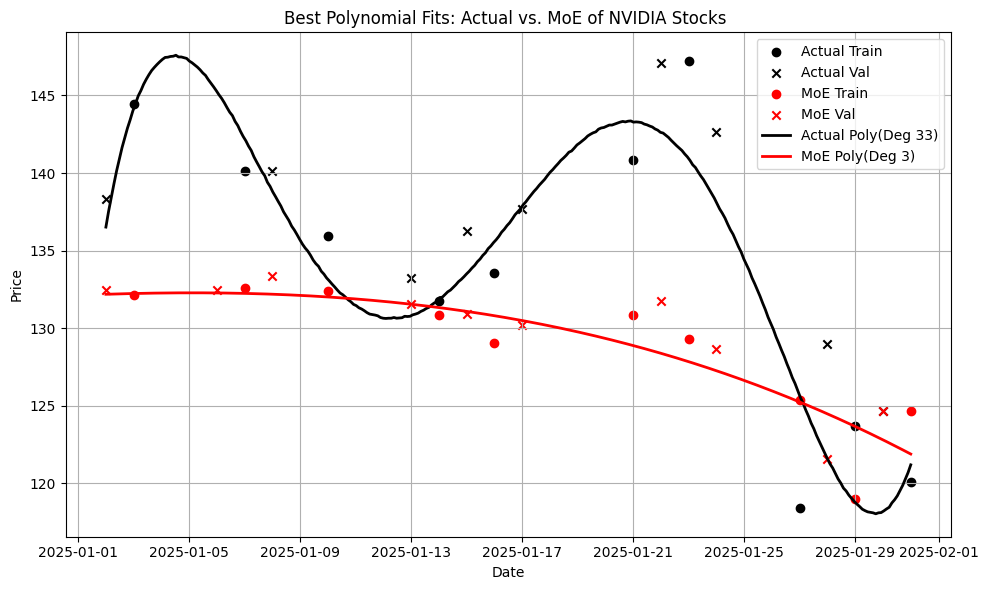


=== Best Polynomial Fitting Results ===
[Actual] => Degree=33, Val MSE=17.233725
     y = 7.1944e-129*x^33+1.3536e-125*x^32-1.2225e-120*x^31-3.7289e-116*x^30-7.6074e-112*x^29-1.2299e-107*x^28-1.5183e-103*x^27-8.2818e-100*x^26+2.5818e-95*x^25+1.2635e-90*x^24+3.5130e-86*x^23+8.2915e-82*x^22+1.6918e-77*x^21+3.0931e-73*x^20+4.9310e-69*x^19+6.5483e-65*x^18+4.5224e-61*x^17-9.3786e-57*x^16-5.1368e-52*x^15-1.6363e-47*x^14-4.1074e-43*x^13-9.0197e-39*x^12-1.7963e-34*x^11-3.1334e-30*x^10-4.4162e-26*x^9-3.8617e-22*x^8+4.7647e-18*x^7+3.5800e-13*x^6+1.1597e-08*x^5+2.8903e-04*x^4+5.8047e+00*x^3+7.7709e+04*x^2-3.4690e+08*x-7.3692e+13

[MoE] => Degree=3, Val MSE=2.701464
     y = -2.0292e-04*x^3+1.2221e+01*x^2-2.4536e+05*x+1.6420e+09

=== Derivative for Actual ===
   d/dx of Actual => 2.3742e-127*x^32+4.3316e-124*x^31-3.7897e-119*x^30-1.1187e-114*x^29-2.2062e-110*x^28-3.4438e-106*x^27-4.0994e-102*x^26-2.1533e-98*x^25+6.4545e-94*x^24+3.0323e-89*x^23+8.0799e-85*x^22+1.8241e-80*x^21+3.5528e-76*x^20+6.186

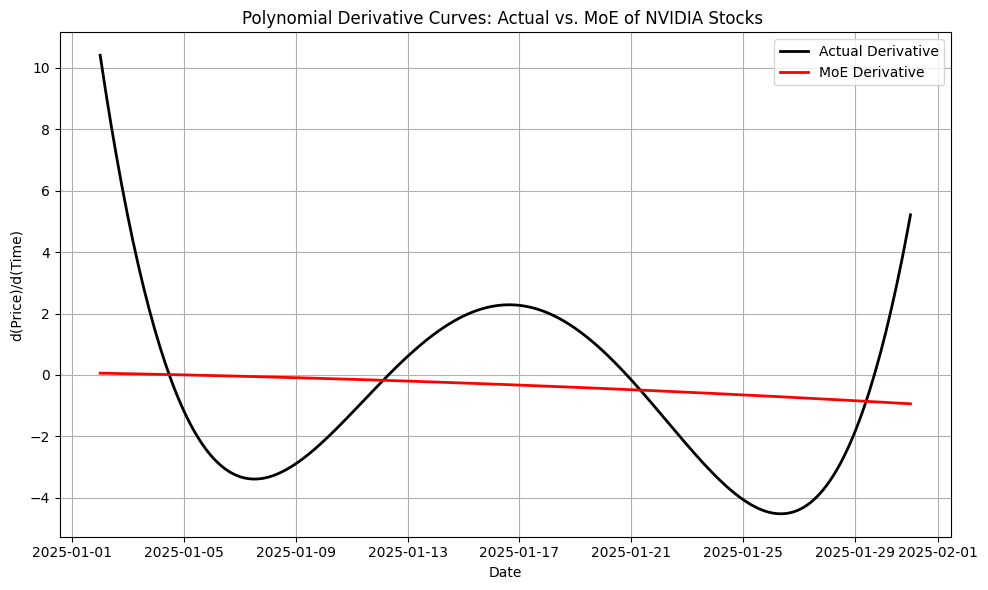

===== Naive Conservative Trade Log =====
Long  | 2025-01-02 -> 2025-01-05 (4 days) | Entry=138.31, Exit=144.47 (AbsDiff=6.16) | Return: 4.45% | EndCapital=104.45
Short | 2025-01-06 -> 2025-01-31 (26 days) | Entry=149.43, Exit=120.07 (AbsDiff=29.36) | Return: 24.45% | EndCapital=130.00

=== Final Results (Naive Conservative) ===
  Final capital  = 130.00
  Final PnL      = 30.00
  Final Return   = 30.00%



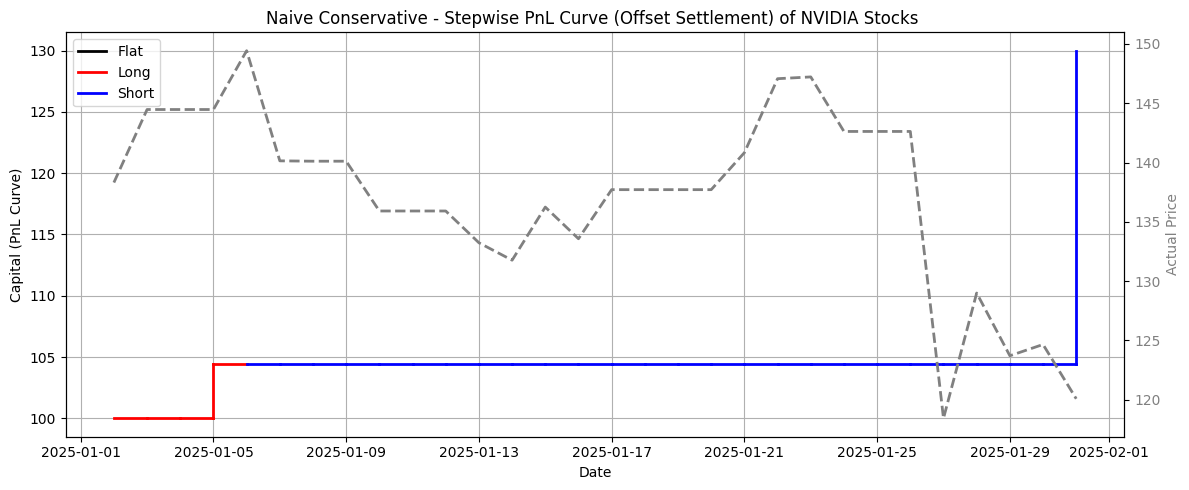

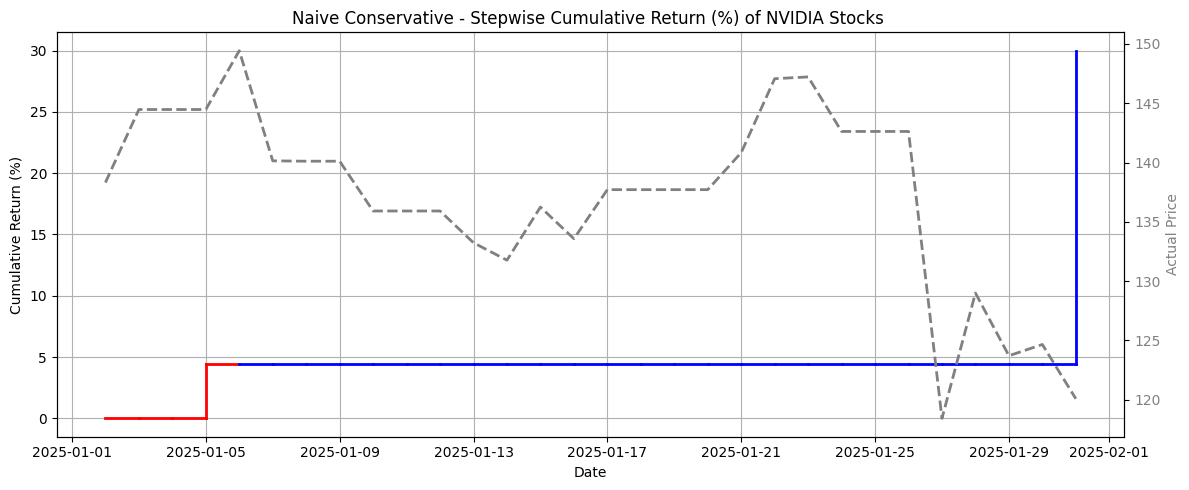

===== Naive Optimistic Trade Log =====
Long  | 2025-01-02 -> 2025-01-05 (4 days) | Entry=138.31, Exit=144.47 (AbsDiff=6.16) | Return: 4.45% | EndCapital=104.45
Short | 2025-01-06 -> 2025-01-31 (26 days) | Entry=149.43, Exit=120.07 (AbsDiff=29.36) | Return: 24.45% | EndCapital=130.00

=== Final Results (Naive Optimistic) ===
  Final capital  = 130.00
  Final PnL      = 30.00
  Final Return   = 30.00%



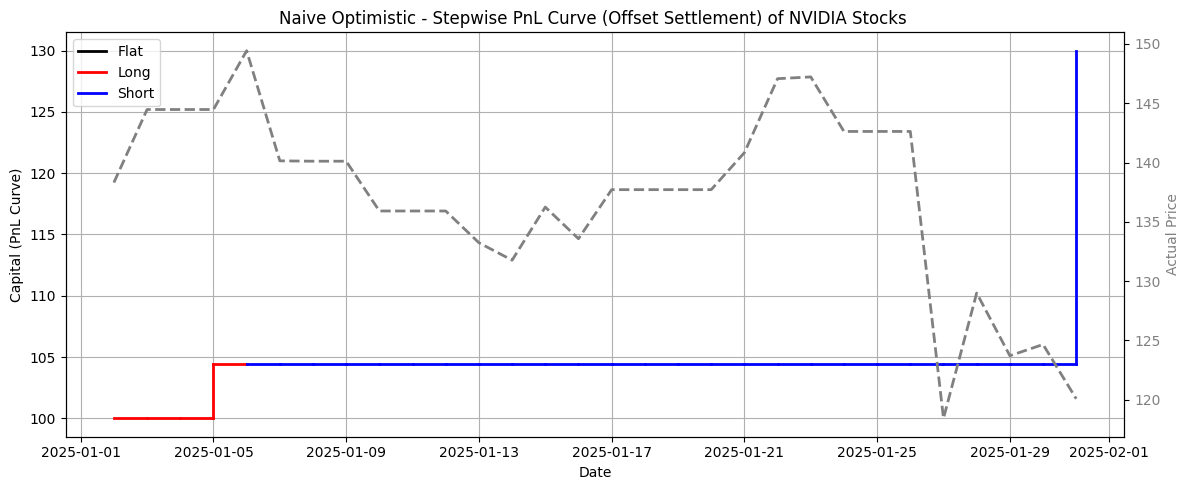

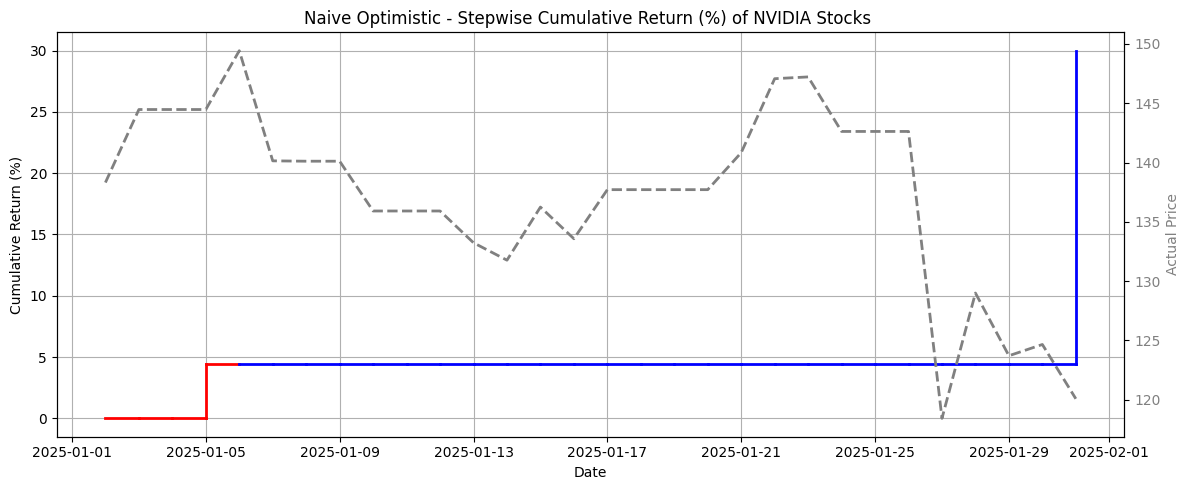

=== DONE with MoE derivative-based Naive Strategies ===


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from matplotlib.lines import Line2D

###############################################################################
# 1) POLYNOMIAL FITTING FOR ACTUAL & MoE
###############################################################################
def polynomial_fitting_actual_and_moe_return(
    df_moe,
    csv_actual="NVIDIA Stock Price History_Final Pure Predictions.csv",
    max_degree=70
):
    df_actual = pd.read_csv(csv_actual)
    df_actual["Date"] = pd.to_datetime(df_actual["Date"], errors="coerce")
    for col in ["Vol.", "Change %"]:
        if col in df_actual.columns:
            df_actual.drop(columns=[col], errors="ignore", inplace=True)

    if "Price" in df_actual.columns:
        df_actual["Price"] = (
            df_actual["Price"]
            .astype(str)
            .str.replace(",", "", regex=True)
            .astype(float)
        )
    df_actual.sort_values("Date", inplace=True)
    df_actual.reset_index(drop=True, inplace=True)

    # Merge your df_moe => [Date, MoE], then with df_actual => [Date, Actual]
    df_moe_rename = df_moe.rename(columns={"ForecastDate": "Date", "MOE_Price": "MoE"}).copy()
    df_moe_rename.sort_values("Date", inplace=True)
    df_moe_rename.reset_index(drop=True, inplace=True)

    df_merge = pd.merge(
        df_moe_rename[["Date","MoE"]],
        df_actual[["Date","Price"]],
        on="Date",
        how="inner"
    ).rename(columns={"Price": "Actual"})

    if df_merge.empty:
        print("No overlapping dates => cannot do polynomial fitting.")
        return pd.DataFrame(), {}

    df_merge.sort_values("Date", inplace=True)
    df_merge.reset_index(drop=True, inplace=True)

    df_merge["mdates_num"] = mdates.date2num(df_merge["Date"])
    n_points = len(df_merge)
    indices = np.arange(n_points)
    val_mask = (indices % 2 == 0)
    train_mask = ~val_mask

    columns_to_fit = ["Actual", "MoE"]
    best_poly_info = {}

    def format_poly(coeffs):
        terms = []
        deg = len(coeffs) - 1
        for i, c in enumerate(coeffs):
            power = deg - i
            if power > 1:
                terms.append(f"{c:+.4e}*x^{power}")
            elif power == 1:
                terms.append(f"{c:+.4e}*x")
            else:
                terms.append(f"{c:+.4e}")
        expr = "".join(terms).replace("+-","-")
        if expr.startswith("+"):
            expr = expr[1:]
        return expr

    # ---------------- FIT THE POLYNOMIALS ----------------
    from sklearn.metrics import mean_squared_error

    for col in columns_to_fit:
        x_train = df_merge.loc[train_mask, "mdates_num"].values
        y_train = df_merge.loc[train_mask, col].values
        x_val   = df_merge.loc[val_mask, "mdates_num"].values
        y_val   = df_merge.loc[val_mask, col].values

        best_deg = None
        best_mse = float("inf")
        best_coefs = None

        for deg_ in range(1, max_degree + 1):
            coefs_ = np.polyfit(x_train, y_train, deg_)
            preds_val = np.polyval(coefs_, x_val)
            val_mse = mean_squared_error(y_val, preds_val)
            if val_mse < best_mse:
                best_mse = val_mse
                best_deg = deg_
                best_coefs = coefs_

        best_poly_info[col] = {
            "degree": best_deg,
            "mse": best_mse,
            "coeffs": best_coefs
        }

    # ------------------ VISUALIZE THE BEST POLYNOMIALS ------------------
    plt.figure(figsize=(10,6))
    plt.scatter(df_merge.loc[train_mask, "Date"], df_merge.loc[train_mask, "Actual"],
                color="black", marker="o", label="Actual Train")
    plt.scatter(df_merge.loc[val_mask, "Date"], df_merge.loc[val_mask, "Actual"],
                color="black", marker="x", label="Actual Val")

    plt.scatter(df_merge.loc[train_mask, "Date"], df_merge.loc[train_mask, "MoE"],
                color="red", marker="o", label="MoE Train")
    plt.scatter(df_merge.loc[val_mask, "Date"], df_merge.loc[val_mask, "MoE"],
                color="red", marker="x", label="MoE Val")

    x_dense = np.linspace(df_merge["mdates_num"].min(), df_merge["mdates_num"].max(), 300)
    x_dense_dates = [mdates.num2date(xx) for xx in x_dense]
    color_map = {"Actual":"black", "MoE":"red"}

    for col in columns_to_fit:
        info = best_poly_info[col]
        coefs_ = info["coeffs"]
        color_ = color_map.get(col, "gray")
        y_dense = np.polyval(coefs_, x_dense)
        plt.plot(x_dense_dates, y_dense,
                 color=color_, linewidth=2,
                 label=f"{col} Poly(Deg {info['degree']})")

    plt.title("Best Polynomial Fits: Actual vs. MoE of NVIDIA Stocks ")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("\n=== Best Polynomial Fitting Results ===")
    for col in columns_to_fit:
        deg_   = best_poly_info[col]["degree"]
        mse_   = best_poly_info[col]["mse"]
        coefs_ = best_poly_info[col]["coeffs"]
        expr_  = format_poly(coefs_)
        print(f"[{col}] => Degree={deg_}, Val MSE={mse_:.6f}")
        print(f"     y = {expr_}\n")

    # ------------------ DERIVATIVES PLOT ------------------
    plt.figure(figsize=(10,6))
    for col in columns_to_fit:
        coefs_ = best_poly_info[col]["coeffs"]
        d_coefs = np.polyder(coefs_)
        y_deriv = np.polyval(d_coefs, x_dense)

        color_ = color_map.get(col, "gray")
        plt.plot(x_dense_dates, y_deriv, color=color_, linewidth=2, label=f"{col} Derivative")

        d_expr_ = format_poly(d_coefs)
        print(f"=== Derivative for {col} ===")
        print(f"   d/dx of {col} => {d_expr_}\n")

    plt.title("Polynomial Derivative Curves: Actual vs. MoE of NVIDIA Stocks ")
    plt.xlabel("Date")
    plt.ylabel("d(Price)/d(Time)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df_merge, best_poly_info


###############################################################################
# 2) HELPER FUNCTIONS FOR TRADING SIMULATION & PLOTTING
###############################################################################
def get_plot_segments(df, signal_col="Signal"):
    """
    Identify contiguous segments with the same signal.
    Returns a list of (start_index, end_index, signal_value).
    """
    segs = []
    start_idx = 0
    curr_signal = df.loc[0, signal_col]
    for idx in range(1, len(df)):
        if df.loc[idx, signal_col] != curr_signal:
            segs.append((start_idx, idx - 1, curr_signal))
            start_idx = idx
            curr_signal = df.loc[idx, signal_col]
    segs.append((start_idx, len(df) - 1, curr_signal))
    return segs

def piecewise_trading_simulation_offset(df_signal):
    """
    Simulate trading using daily signals with offset settlement:
      - Start capital=100
      - Realize PnL only at segment's end
      - Single-day => "Flat" as well
    """
    segments = get_plot_segments(df_signal, "Signal")

    capital = 100.0
    cap_arr = np.zeros(len(df_signal))
    trade_log = []

    for (start, end, sig) in segments:
        seg_days = end - start + 1
        start_date = df_signal.loc[start, "Date"]
        end_date   = df_signal.loc[end,   "Date"]

        # Forward-propagate capital for [start..end]
        for i in range(start, end + 1):
            cap_arr[i] = capital

        # SINGLE-DAY => label as "Flat"
        if seg_days == 1:
            trade_log.append({
                "Signal": "Flat",
                "StartDate": start_date,
                "EndDate": end_date,
                "Days": seg_days,
                "EntryPrice": df_signal.loc[start, "Actual"],
                "ExitPrice": df_signal.loc[end, "Actual"],
                "AbsDiff": 0.0,
                "SegmentReturn(%)": 0.0,
                "EndCapital": capital
            })
            continue

        if sig == 0:
            # Flat
            trade_log.append({
                "Signal": "Flat",
                "StartDate": start_date,
                "EndDate": end_date,
                "Days": seg_days,
                "EntryPrice": df_signal.loc[start, "Actual"],
                "ExitPrice": df_signal.loc[end,   "Actual"],
                "AbsDiff": abs(df_signal.loc[end, "Actual"] - df_signal.loc[start, "Actual"]),
                "SegmentReturn(%)": 0.0,
                "EndCapital": capital
            })
        elif sig == 1:
            # Long
            entry_price = df_signal.loc[start, "Actual"]
            exit_price  = df_signal.loc[end,   "Actual"]
            final_cap   = capital * (exit_price / entry_price)
            seg_return  = (final_cap / capital) - 1.0

            cap_arr[end] = final_cap
            capital = final_cap

            trade_log.append({
                "Signal": "Long",
                "StartDate": start_date,
                "EndDate": end_date,
                "Days": seg_days,
                "EntryPrice": entry_price,
                "ExitPrice": exit_price,
                "AbsDiff": abs(exit_price - entry_price),
                "SegmentReturn(%)": seg_return * 100.0,
                "EndCapital": final_cap
            })
        else:
            # Short
            entry_price = df_signal.loc[start, "Actual"]
            exit_price  = df_signal.loc[end,   "Actual"]
            final_cap   = capital * (entry_price / exit_price)
            seg_return  = (final_cap / capital) - 1.0

            cap_arr[end] = final_cap
            capital = final_cap

            trade_log.append({
                "Signal": "Short",
                "StartDate": start_date,
                "EndDate": end_date,
                "Days": seg_days,
                "EntryPrice": entry_price,
                "ExitPrice": exit_price,
                "AbsDiff": abs(exit_price - entry_price),
                "SegmentReturn(%)": seg_return * 100.0,
                "EndCapital": final_cap
            })

    # Forward-fill capital for any days after the final segment
    last_cap = capital
    for i in range(len(df_signal)):
        if cap_arr[i] == 0.0:
            cap_arr[i] = last_cap
        else:
            last_cap = cap_arr[i]

    df_signal["Capital"] = cap_arr
    df_signal["Cumulative_PnL"] = df_signal["Capital"] - 100.0
    df_signal["Cumulative_Return"] = (df_signal["Cumulative_PnL"] / 100.0) * 100.0

    return df_signal, trade_log

def reindex_to_daily(df_signal):
    """
    Expands the DataFrame to a daily frequency from min..max date,
    then forward-fills *any numeric columns that already exist*.
    """
    df_signal = df_signal.copy()
    df_signal.set_index("Date", inplace=True)
    all_days = pd.date_range(df_signal.index.min(), df_signal.index.max(), freq="D")

    # Reindex
    df_signal = df_signal.reindex(all_days)

    # Forward-fill any numeric columns that exist
    for col in df_signal.columns:
        if pd.api.types.is_numeric_dtype(df_signal[col]):
            df_signal[col].ffill(inplace=True)

    df_signal.reset_index(inplace=True)
    df_signal.rename(columns={"index": "Date"}, inplace=True)
    return df_signal

def plot_piecewise_results_daybyday(df_signal, trade_log, title_prefix=""):
    """
    Stepwise PnL curve, color-coded by signal.
    Prints trade log & final results.
    """
    print(f"===== {title_prefix} Trade Log =====")
    for trd in trade_log:
        print(
            f"{trd['Signal']:5s} | {trd['StartDate'].date()} -> {trd['EndDate'].date()} "
            f"({trd['Days']} days) | Entry={trd['EntryPrice']:.2f}, Exit={trd['ExitPrice']:.2f} "
            f"(AbsDiff={trd['AbsDiff']:.2f}) | Return: {trd['SegmentReturn(%)']:.2f}% "
            f"| EndCapital={trd['EndCapital']:.2f}"
        )

    final_cap = df_signal["Capital"].iloc[-1]
    final_pnl = df_signal["Cumulative_PnL"].iloc[-1]
    final_ret = df_signal["Cumulative_Return"].iloc[-1]
    print(f"\n=== Final Results ({title_prefix}) ===")
    print(f"  Final capital  = {final_cap:.2f}")
    print(f"  Final PnL      = {final_pnl:.2f}")
    print(f"  Final Return   = {final_ret:.2f}%\n")

    fig, ax1 = plt.subplots(figsize=(12,5))
    color_map = {0:"black", 1:"red", -1:"blue"}

    n_rows = len(df_signal)
    for i in range(1, n_rows):
        sig_prev = int(df_signal.loc[i-1, "Signal"])
        x_vals_h = [df_signal.loc[i-1,"Date"], df_signal.loc[i,"Date"]]
        y_vals_h = [df_signal.loc[i-1,"Capital"], df_signal.loc[i-1,"Capital"]]
        ax1.plot(x_vals_h, y_vals_h, color=color_map[sig_prev], linewidth=2)

        x_vals_v = [df_signal.loc[i,"Date"], df_signal.loc[i,"Date"]]
        y_vals_v = [df_signal.loc[i-1,"Capital"], df_signal.loc[i,"Capital"]]
        ax1.plot(x_vals_v, y_vals_v, color=color_map[sig_prev], linewidth=2)

    ax1.set_xlabel("Date")
    ax1.set_ylabel("Capital (PnL Curve)")
    ax1.grid(True)

    ax2 = ax1.twinx()
    ax2.plot(df_signal["Date"], df_signal["Actual"], color="gray", linestyle="--", linewidth=2)
    ax2.set_ylabel("Actual Price", color="gray")
    ax2.tick_params(axis='y', labelcolor="gray")

    legend_elems = [
        Line2D([0],[0], color='black', lw=2, label='Flat'),
        Line2D([0],[0], color='red',   lw=2, label='Long'),
        Line2D([0],[0], color='blue',  lw=2, label='Short')
    ]
    ax1.legend(handles=legend_elems, loc="upper left")
    ax1.set_title(f"{title_prefix} - Stepwise PnL Curve (Offset Settlement) of NVIDIA Stocks ")
    plt.tight_layout()
    plt.show()

def plot_piecewise_results_daybyday_pct(df_signal, title_prefix=""):
    """
    Plots stepwise 'Cumulative_Return' vs Date, color-coded by signal.
    """
    fig, ax1 = plt.subplots(figsize=(12,5))
    color_map = {0:"black", 1:"red", -1:"blue"}

    n_rows = len(df_signal)
    for i in range(1, n_rows):
        sig_prev = int(df_signal.loc[i-1, "Signal"])
        x_vals_h = [df_signal.loc[i-1,"Date"], df_signal.loc[i,"Date"]]
        y_vals_h = [df_signal.loc[i-1,"Cumulative_Return"], df_signal.loc[i-1,"Cumulative_Return"]]
        ax1.plot(x_vals_h, y_vals_h, color=color_map[sig_prev], linewidth=2)

        x_vals_v = [df_signal.loc[i,"Date"], df_signal.loc[i,"Date"]]
        y_vals_v = [df_signal.loc[i-1,"Cumulative_Return"], df_signal.loc[i,"Cumulative_Return"]]
        ax1.plot(x_vals_v, y_vals_v, color=color_map[sig_prev], linewidth=2)

    ax1.set_xlabel("Date")
    ax1.set_ylabel("Cumulative Return (%)")
    ax1.grid(True)

    ax2 = ax1.twinx()
    ax2.plot(df_signal["Date"], df_signal["Actual"], color="gray", linestyle="--", linewidth=2)
    ax2.set_ylabel("Actual Price", color="gray")
    ax2.tick_params(axis='y', labelcolor="gray")

    ax1.set_title(f"{title_prefix} - Stepwise Cumulative Return (%) of NVIDIA Stocks ")
    plt.tight_layout()
    plt.show()


###############################################################################
# 3) MAIN HOOK: NAIVE CONSERVATIVE & OPTIMISTIC (MOE DERIVATIVE)
###############################################################################
if __name__ == "__main__":

    # Suppose df_moe has ["ForecastDate","MOE_Price"], loaded from prior steps
    # e.g., df_moe = pd.read_csv("some_file.csv")

    df_moe_poly, best_poly_info = polynomial_fitting_actual_and_moe_return(
        df_moe,
        csv_actual="NVIDIA Stock Price History_Final Pure Predictions.csv",
        max_degree=70
    )

    if df_moe_poly.empty or ("MoE" not in best_poly_info):
        print("Cannot proceed with trading strategies because polynomial info is missing.")
    else:
        # 1) Compute derivative of MoE polynomial
        moe_coeffs = best_poly_info["MoE"]["coeffs"]
        d_moe_coeffs = np.polyder(moe_coeffs)
        moe_grads = np.polyval(d_moe_coeffs, df_moe_poly["mdates_num"])

        # 2) Build signals. (We have only 1 model => same logic for "conservative" & "optimistic")
        n_days = len(df_moe_poly)
        signals_conservative = np.zeros(n_days, dtype=int)
        signals_optimistic   = np.zeros(n_days, dtype=int)

        for i in range(n_days):
            g = moe_grads[i]
            # Conservative
            if g > 0:
                signals_conservative[i] = 1
            elif g < 0:
                signals_conservative[i] = -1
            else:
                signals_conservative[i] = 0

            # Optimistic
            if g > 0:
                signals_optimistic[i] = 1
            elif g < 0:
                signals_optimistic[i] = -1
            else:
                signals_optimistic[i] = 0

        # --------------------------------------------------------------------
        #  NAIVE CONSERVATIVE
        # --------------------------------------------------------------------
        df_con = df_moe_poly.copy()
        df_con["Signal"] = signals_conservative
        
        # Reindex so all calendar days appear, with any missing days => flat Signal=0
        df_con = reindex_to_daily(df_con)
        
        # Now run simulation and plot
        df_con_sim, log_con = piecewise_trading_simulation_offset(df_con)
        plot_piecewise_results_daybyday(df_con_sim, log_con, title_prefix="Naive Conservative")
        plot_piecewise_results_daybyday_pct(df_con_sim, title_prefix="Naive Conservative")

        # --------------------------------------------------------------------
        #  NAIVE OPTIMISTIC
        # --------------------------------------------------------------------
        df_opt = df_moe_poly.copy()
        df_opt["Signal"] = signals_optimistic

        # Reindex
        df_opt = reindex_to_daily(df_opt)

        # Simulation & plot
        df_opt_sim, log_opt = piecewise_trading_simulation_offset(df_opt)
        plot_piecewise_results_daybyday(df_opt_sim, log_opt, title_prefix="Naive Optimistic")
        plot_piecewise_results_daybyday_pct(df_opt_sim, title_prefix="Naive Optimistic")

        print("=== DONE with MoE derivative-based Naive Strategies ===")


/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: 

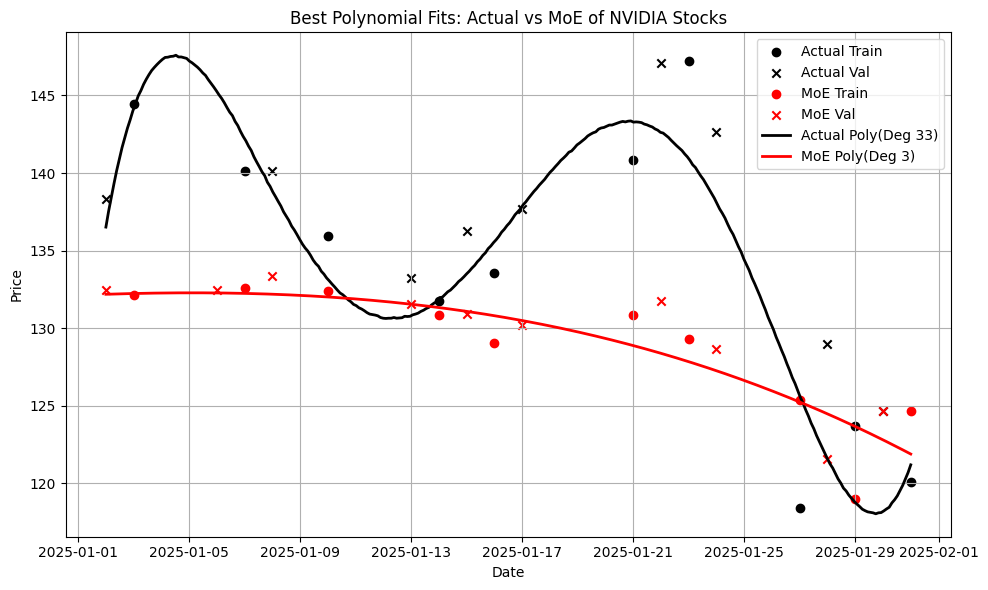


=== Best Polynomial Fitting Results ===
[Actual] => Degree=33, Val MSE=17.233725
     y = 7.1944e-129*x^33+1.3536e-125*x^32-1.2225e-120*x^31-3.7289e-116*x^30-7.6074e-112*x^29-1.2299e-107*x^28-1.5183e-103*x^27-8.2818e-100*x^26+2.5818e-95*x^25+1.2635e-90*x^24+3.5130e-86*x^23+8.2915e-82*x^22+1.6918e-77*x^21+3.0931e-73*x^20+4.9310e-69*x^19+6.5483e-65*x^18+4.5224e-61*x^17-9.3786e-57*x^16-5.1368e-52*x^15-1.6363e-47*x^14-4.1074e-43*x^13-9.0197e-39*x^12-1.7963e-34*x^11-3.1334e-30*x^10-4.4162e-26*x^9-3.8617e-22*x^8+4.7647e-18*x^7+3.5800e-13*x^6+1.1597e-08*x^5+2.8903e-04*x^4+5.8047e+00*x^3+7.7709e+04*x^2-3.4690e+08*x-7.3692e+13

[MoE] => Degree=3, Val MSE=2.701464
     y = -2.0292e-04*x^3+1.2221e+01*x^2-2.4536e+05*x+1.6420e+09

=== Derivative for Actual ===
   d/dx of Actual => 2.3742e-127*x^32+4.3316e-124*x^31-3.7897e-119*x^30-1.1187e-114*x^29-2.2062e-110*x^28-3.4438e-106*x^27-4.0994e-102*x^26-2.1533e-98*x^25+6.4545e-94*x^24+3.0323e-89*x^23+8.0799e-85*x^22+1.8241e-80*x^21+3.5528e-76*x^20+6.186

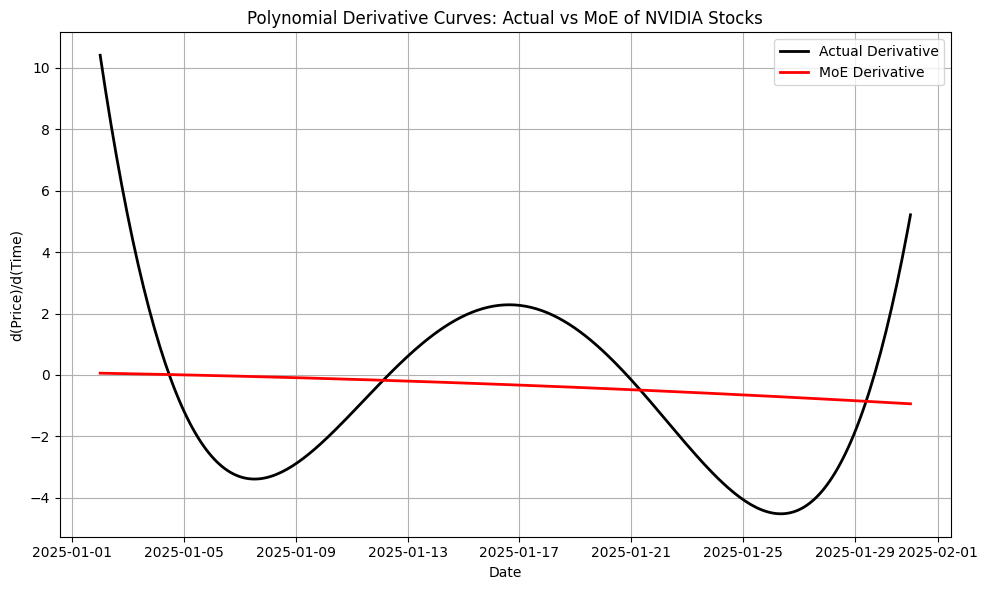

===== Naive Conservative Trade Log =====
Long  | 2025-01-02 -> 2025-01-03 (2 days) | Entry=138.31, Exit=144.47 (AbsDiff=6.16) | Return: 4.45% | EndCapital=104.45
Short | 2025-01-06 -> 2025-01-31 (18 days) | Entry=149.43, Exit=120.07 (AbsDiff=29.36) | Return: 24.45% | EndCapital=130.00

=== Final Results (Naive Conservative) ===
  Final capital  = 130.00
  Final PnL      = 30.00
  Final Return   = 30.00%



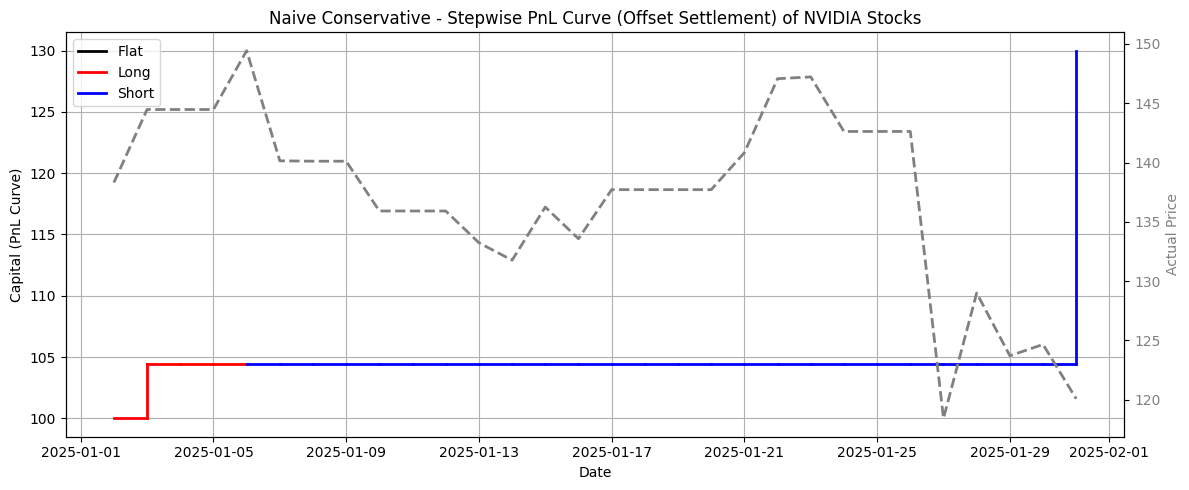

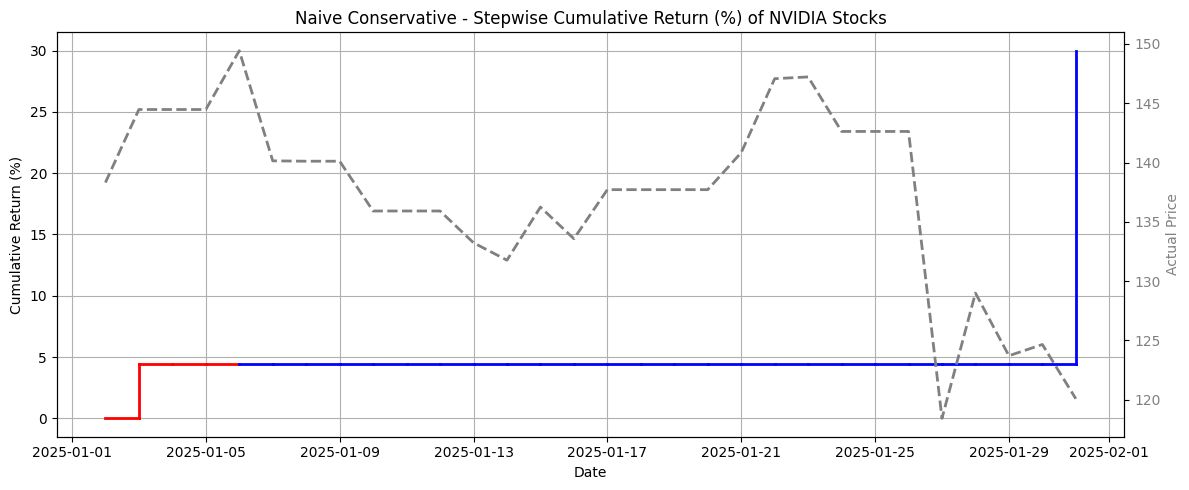

===== Naive Optimistic Trade Log =====
Long  | 2025-01-02 -> 2025-01-03 (2 days) | Entry=138.31, Exit=144.47 (AbsDiff=6.16) | Return: 4.45% | EndCapital=104.45
Short | 2025-01-06 -> 2025-01-31 (18 days) | Entry=149.43, Exit=120.07 (AbsDiff=29.36) | Return: 24.45% | EndCapital=130.00

=== Final Results (Naive Optimistic) ===
  Final capital  = 130.00
  Final PnL      = 30.00
  Final Return   = 30.00%



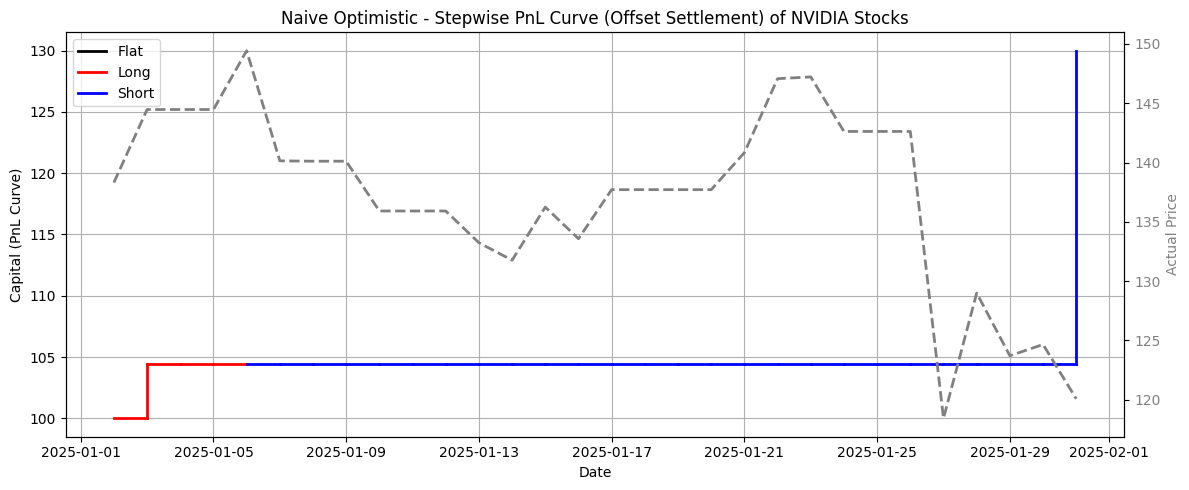

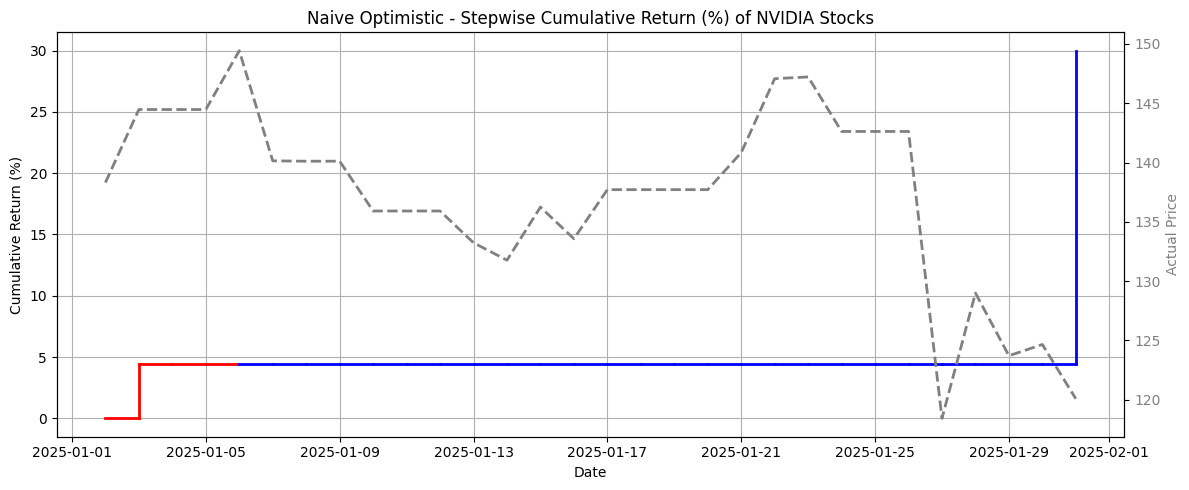

=== DONE with MoE derivative-based Naive Strategies ===


In [3]:
########################################################################
# 8) POLYNOMIAL FITTING + NAIVE TRADING STRATEGIES FOR MoE (SELF-CONTAINED)
########################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from matplotlib.lines import Line2D

def polynomial_fitting_actual_and_moe_return(df_moe, csv_actual="NVIDIA Stock Price History_Final Pure Predictions.csv", max_degree=70):
    """
    1) Reads 'csv_actual' for the true Silver price.
    2) Merges it with df_moe (columns: ["ForecastDate","MOE_Price"]).
    3) Renames columns so we have 'Date', 'MoE', 'Actual'.
    4) Splits data into train/val (by even/odd index), fits polynomials for 'Actual' and 'MoE'.
    5) Plots the polynomials + their derivatives.
    6) Returns:
         - df_merge: A DataFrame with columns ["Date","Actual","MoE","mdates_num"]
         - best_poly_info: A dict with best_fit polynomial coefficients for "Actual" and "MoE".
    """
    # -- A) Read actual data and merge with MoE
    df_actual = pd.read_csv(csv_actual)
    df_actual["Date"] = pd.to_datetime(df_actual["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_actual.columns:
            df_actual.drop(columns=[col], errors="ignore", inplace=True)

    if "Price" in df_actual.columns:
        df_actual["Price"] = (
            df_actual["Price"]
            .astype(str)
            .str.replace(",", "", regex=True)
            .astype(float)
        )
    df_actual.sort_values("Date", inplace=True)
    df_actual.reset_index(drop=True, inplace=True)

    # rename df_moe columns => "Date", "MoE"
    df_moe_rename = df_moe.rename(columns={"ForecastDate": "Date", "MOE_Price": "MoE"}).copy()
    df_moe_rename.sort_values("Date", inplace=True)
    df_moe_rename.reset_index(drop=True, inplace=True)

    # Merge => columns: [Date, MoE, Price]
    # Then rename Price -> Actual
    df_merge = pd.merge(
        df_moe_rename[["Date","MoE"]],
        df_actual[["Date","Price"]],
        on="Date",
        how="inner"
    ).rename(columns={"Price": "Actual"})

    if df_merge.empty:
        print("No overlapping dates => cannot do polynomial fitting.")
        return pd.DataFrame(), {}

    df_merge.sort_values("Date", inplace=True)
    df_merge.reset_index(drop=True, inplace=True)

    # We will do a train/val approach for each column (Actual, MoE).
    columns_to_fit = ["Actual", "MoE"]

    # Convert Date => numeric axis
    df_merge["mdates_num"] = mdates.date2num(df_merge["Date"])
    n_points = len(df_merge)
    indices = np.arange(n_points)
    val_mask = (indices % 2 == 0)    # even indices => validation
    train_mask = ~val_mask           # odd indices => training

    color_map = {"Actual":"black", "MoE":"red"}

    # We'll store best polynomials for each in a dict
    best_poly_info = {}

    def format_poly(coeffs):
        terms = []
        deg = len(coeffs) - 1
        for i, c in enumerate(coeffs):
            power = deg - i
            if power > 1:
                terms.append(f"{c:+.4e}*x^{power}")
            elif power == 1:
                terms.append(f"{c:+.4e}*x")
            else:
                terms.append(f"{c:+.4e}")
        expr = "".join(terms).replace("+-","-")
        if expr.startswith("+"):
            expr = expr[1:]
        return expr

    # ---------------- FIT THE POLYNOMIALS ----------------
    for col in columns_to_fit:
        x_train = df_merge.loc[train_mask, "mdates_num"].values
        y_train = df_merge.loc[train_mask, col].values

        x_val   = df_merge.loc[val_mask, "mdates_num"].values
        y_val   = df_merge.loc[val_mask, col].values

        best_deg = None
        best_mse = float("inf")
        best_coefs = None

        for deg_ in range(1, max_degree + 1):
            coefs_ = np.polyfit(x_train, y_train, deg_)
            preds_val = np.polyval(coefs_, x_val)
            val_mse = mean_squared_error(y_val, preds_val)
            if val_mse < best_mse:
                best_mse = val_mse
                best_deg = deg_
                best_coefs = coefs_

        best_poly_info[col] = {
            "degree": best_deg,
            "mse": best_mse,
            "coeffs": best_coefs
        }

    # ------------------ PLOT THE BEST POLYNOMIALS ------------------
    plt.figure(figsize=(10,6))

    # Plot data points
    # 'Actual' => black, 'MoE' => red
    plt.scatter(df_merge.loc[train_mask, "Date"], df_merge.loc[train_mask, "Actual"],
                color="black", marker="o", label="Actual Train")
    plt.scatter(df_merge.loc[val_mask, "Date"], df_merge.loc[val_mask, "Actual"],
                color="black", marker="x", label="Actual Val")

    plt.scatter(df_merge.loc[train_mask, "Date"], df_merge.loc[train_mask, "MoE"],
                color="red", marker="o", label="MoE Train")
    plt.scatter(df_merge.loc[val_mask, "Date"], df_merge.loc[val_mask, "MoE"],
                color="red", marker="x", label="MoE Val")

    # Dense x for plotting
    x_dense = np.linspace(df_merge["mdates_num"].min(), df_merge["mdates_num"].max(), 300)
    x_dense_dates = [mdates.num2date(xx) for xx in x_dense]

    for col in columns_to_fit:
        info = best_poly_info[col]
        deg_ = info["degree"]
        coefs_ = info["coeffs"]
        color_ = color_map.get(col, "gray")
        y_dense = np.polyval(coefs_, x_dense)

        plt.plot(x_dense_dates, y_dense,
                 color=color_, linewidth=2, label=f"{col} Poly(Deg {deg_})")

    plt.title("Best Polynomial Fits: Actual vs MoE of NVIDIA Stocks")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ------------------ PRINT THE POLYNOMIAL EXPRESSIONS ------------------
    print("\n=== Best Polynomial Fitting Results ===")
    for col in columns_to_fit:
        deg_   = best_poly_info[col]["degree"]
        mse_   = best_poly_info[col]["mse"]
        coefs_ = best_poly_info[col]["coeffs"]
        expr_  = format_poly(coefs_)
        print(f"[{col}] => Degree={deg_}, Val MSE={mse_:.6f}")
        print(f"     y = {expr_}\n")

    # ------------------ PLOT DERIVATIVES ------------------
    plt.figure(figsize=(10,6))
    for col in columns_to_fit:
        coefs_ = best_poly_info[col]["coeffs"]
        d_coefs = np.polyder(coefs_)
        y_deriv = np.polyval(d_coefs, x_dense)

        color_ = color_map.get(col, "gray")
        plt.plot(x_dense_dates, y_deriv, color=color_, linewidth=2, label=f"{col} Derivative")

        d_expr_ = format_poly(d_coefs)
        print(f"=== Derivative for {col} ===")
        print(f"   d/dx of {col} => {d_expr_}\n")

    plt.title("Polynomial Derivative Curves: Actual vs MoE of NVIDIA Stocks")
    plt.xlabel("Date")
    plt.ylabel("d(Price)/d(Time)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df_merge, best_poly_info


###############################################################################
# After we get df_moe_poly (with 'Date','Actual','MoE','mdates_num') and best_poly_info,
# we can run the Naive Conservative & Optimistic strategies.
###############################################################################
def get_plot_segments(df, signal_col="Signal"):
    """
    Identify contiguous segments with the same signal.
    Returns a list of tuples: (start_index, end_index, signal_value).
    """
    segs = []
    start_idx = 0
    curr_signal = df.loc[0, signal_col]
    for idx in range(1, len(df)):
        if df.loc[idx, signal_col] != curr_signal:
            segs.append((start_idx, idx - 1, curr_signal))
            start_idx = idx
            curr_signal = df.loc[idx, signal_col]
    segs.append((start_idx, len(df) - 1, curr_signal))
    return segs


def piecewise_trading_simulation_offset(df_signal):
    """
    Simulate trading using daily signals with an offset-based approach:
      - Start capital = 100
      - Multi-day segment => realize PnL at final day
      - 1-day segments => ignored
    """
    segments = get_plot_segments(df_signal, "Signal")
    
    capital = 100.0
    cap_arr = np.zeros(len(df_signal))
    trade_log = []
    
    for (start, end, sig) in segments:
        start_date = df_signal.loc[start, "Date"]
        end_date   = df_signal.loc[end,   "Date"]
        seg_days   = end - start + 1
        
        # Keep capital for [start..end]
        for i in range(start, end + 1):
            cap_arr[i] = capital
        
        if seg_days < 2:
            trade_log.append({
                "Signal": "Flat(ignored)",
                "StartDate": start_date,
                "EndDate": end_date,
                "Days": seg_days,
                "EntryPrice": df_signal.loc[start, "Actual"],
                "ExitPrice": df_signal.loc[end, "Actual"],
                "AbsDiff": 0.0,
                "SegmentReturn(%)": 0.0,
                "EndCapital": capital
            })
            continue
        
        if sig == 0:
            # Flat
            trade_log.append({
                "Signal": "Flat",
                "StartDate": start_date,
                "EndDate": end_date,
                "Days": seg_days,
                "EntryPrice": df_signal.loc[start, "Actual"],
                "ExitPrice": df_signal.loc[end,   "Actual"],
                "AbsDiff": abs(df_signal.loc[end, "Actual"] - df_signal.loc[start, "Actual"]),
                "SegmentReturn(%)": 0.0,
                "EndCapital": capital
            })
        elif sig == 1:
            # Long
            entry_price = df_signal.loc[start, "Actual"]
            exit_price  = df_signal.loc[end,   "Actual"]
            final_cap   = capital * (exit_price / entry_price)
            seg_return  = (final_cap / capital) - 1.0
            
            cap_arr[end] = final_cap
            capital = final_cap
            
            trade_log.append({
                "Signal": "Long",
                "StartDate": start_date,
                "EndDate": end_date,
                "Days": seg_days,
                "EntryPrice": entry_price,
                "ExitPrice": exit_price,
                "AbsDiff": abs(exit_price - entry_price),
                "SegmentReturn(%)": seg_return * 100.0,
                "EndCapital": final_cap
            })
        else:
            # Short
            entry_price = df_signal.loc[start, "Actual"]
            exit_price  = df_signal.loc[end,   "Actual"]
            final_cap   = capital * (entry_price / exit_price)
            seg_return  = (final_cap / capital) - 1.0
            
            cap_arr[end] = final_cap
            capital = final_cap
            
            trade_log.append({
                "Signal": "Short",
                "StartDate": start_date,
                "EndDate": end_date,
                "Days": seg_days,
                "EntryPrice": entry_price,
                "ExitPrice": exit_price,
                "AbsDiff": abs(exit_price - entry_price),
                "SegmentReturn(%)": seg_return * 100.0,
                "EndCapital": final_cap
            })
    
    # Forward-fill capital after last segment
    last_cap = capital
    for i in range(len(df_signal)):
        if cap_arr[i] == 0.0:
            cap_arr[i] = last_cap
        else:
            last_cap = cap_arr[i]
    
    df_signal["Capital"] = cap_arr
    df_signal["Cumulative_PnL"] = df_signal["Capital"] - 100.0
    df_signal["Cumulative_Return"] = (df_signal["Cumulative_PnL"] / 100.0) * 100.0
    
    return df_signal, trade_log


def reindex_to_daily(df_signal):
    """
    Reindex to all calendar days from min..max date, forward-fill numeric columns
    for stepwise plots.
    """
    df_signal = df_signal.copy()
    df_signal.set_index("Date", inplace=True)
    all_days = pd.date_range(df_signal.index.min(), df_signal.index.max(), freq="D")
    df_signal = df_signal.reindex(all_days)
    # forward-fill
    for col in ["Actual","Capital","Cumulative_PnL","Cumulative_Return","Signal"]:
        df_signal[col].ffill(inplace=True)

    df_signal.reset_index(inplace=True)
    df_signal.rename(columns={"index":"Date"}, inplace=True)
    return df_signal


def plot_piecewise_results_daybyday(df_signal, trade_log, title_prefix=""):
    """
    Stepwise PnL curve. Color-coded by signal: 0 => black, 1 => red, -1 => blue.
    Prints trade log & final results.
    """
    # Print trade log
    print(f"===== {title_prefix} Trade Log =====")
    for trd in trade_log:
        print(
            f"{trd['Signal']:5s} | {trd['StartDate'].date()} -> {trd['EndDate'].date()} "
            f"({trd['Days']} days) | Entry={trd['EntryPrice']:.2f}, Exit={trd['ExitPrice']:.2f} "
            f"(AbsDiff={trd['AbsDiff']:.2f}) | Return: {trd['SegmentReturn(%)']:.2f}% "
            f"| EndCapital={trd['EndCapital']:.2f}"
        )
    
    final_cap = df_signal["Capital"].iloc[-1]
    final_pnl = df_signal["Cumulative_PnL"].iloc[-1]
    final_ret = df_signal["Cumulative_Return"].iloc[-1]
    print(f"\n=== Final Results ({title_prefix}) ===")
    print(f"  Final capital  = {final_cap:.2f}")
    print(f"  Final PnL      = {final_pnl:.2f}")
    print(f"  Final Return   = {final_ret:.2f}%\n")

    fig, ax1 = plt.subplots(figsize=(12,5))
    color_map = {0:"black", 1:"red", -1:"blue"}

    n_rows = len(df_signal)
    for i in range(1, n_rows):
        sig_prev = int(df_signal.loc[i-1, "Signal"])
        x_vals_h = [df_signal.loc[i-1,"Date"], df_signal.loc[i,"Date"]]
        y_vals_h = [df_signal.loc[i-1,"Capital"], df_signal.loc[i-1,"Capital"]]
        ax1.plot(x_vals_h, y_vals_h, color=color_map[sig_prev], linewidth=2)

        x_vals_v = [df_signal.loc[i,"Date"], df_signal.loc[i,"Date"]]
        y_vals_v = [df_signal.loc[i-1,"Capital"], df_signal.loc[i,"Capital"]]
        ax1.plot(x_vals_v, y_vals_v, color=color_map[sig_prev], linewidth=2)

    ax1.set_xlabel("Date")
    ax1.set_ylabel("Capital (PnL Curve)")
    ax1.grid(True)

    ax2 = ax1.twinx()
    ax2.plot(df_signal["Date"], df_signal["Actual"], color="gray", linestyle="--", linewidth=2)
    ax2.set_ylabel("Actual Price", color="gray")
    ax2.tick_params(axis='y', labelcolor="gray")

    legend_elems = [
        Line2D([0],[0], color='black', lw=2, label='Flat'),
        Line2D([0],[0], color='red',   lw=2, label='Long'),
        Line2D([0],[0], color='blue',  lw=2, label='Short')
    ]
    ax1.legend(handles=legend_elems, loc="upper left")

    ax1.set_title(f"{title_prefix} - Stepwise PnL Curve (Offset Settlement) of NVIDIA Stocks")
    plt.tight_layout()
    plt.show()


def plot_piecewise_results_daybyday_pct(df_signal, title_prefix=""):
    """
    Plots stepwise 'Cumulative_Return' vs Date. Color-coded by signal.
    """
    fig, ax1 = plt.subplots(figsize=(12,5))
    color_map = {0:"black", 1:"red", -1:"blue"}

    n_rows = len(df_signal)
    for i in range(1, n_rows):
        sig_prev = int(df_signal.loc[i-1, "Signal"])
        x_vals_h = [df_signal.loc[i-1,"Date"], df_signal.loc[i,"Date"]]
        y_vals_h = [df_signal.loc[i-1,"Cumulative_Return"], df_signal.loc[i-1,"Cumulative_Return"]]
        ax1.plot(x_vals_h, y_vals_h, color=color_map[sig_prev], linewidth=2)

        x_vals_v = [df_signal.loc[i,"Date"], df_signal.loc[i,"Date"]]
        y_vals_v = [df_signal.loc[i-1,"Cumulative_Return"], df_signal.loc[i,"Cumulative_Return"]]
        ax1.plot(x_vals_v, y_vals_v, color=color_map[sig_prev], linewidth=2)

    ax1.set_xlabel("Date")
    ax1.set_ylabel("Cumulative Return (%)")
    ax1.grid(True)

    ax2 = ax1.twinx()
    ax2.plot(df_signal["Date"], df_signal["Actual"], color="gray", linestyle="--", linewidth=2)
    ax2.set_ylabel("Actual Price", color="gray")
    ax2.tick_params(axis='y', labelcolor="gray")

    ax1.set_title(f"{title_prefix} - Stepwise Cumulative Return (%) of NVIDIA Stocks")
    plt.tight_layout()
    plt.show()


########################
#  MAIN HOOK:
#   1) Fit polynomials => "df_moe_poly" & "best_poly_info"
#   2) Create signals from derivative of MoE polynomial
#   3) Run Naive Conservative & Optimistic
########################

if __name__ == "__main__":
    # 1) Suppose you already have final_rolling_fc => df_moe
    #    i.e. df_moe with columns ["ForecastDate","MOE_Price"], from the steps above
    #    We'll re-use variable name 'df_moe' here.

    # 2) Fit polynomials => returns a DataFrame with columns [Date, Actual, MoE, mdates_num]
    #    plus the best_poly_info dictionary with polynomial coefs
    df_moe_poly, best_poly_info = polynomial_fitting_actual_and_moe_return(
        df_moe,
        csv_actual="NVIDIA Stock Price History_Final Pure Predictions.csv",
        max_degree=70
    )

    if df_moe_poly.empty or ("MoE" not in best_poly_info):
        print("Cannot proceed with trading strategies because polynomial info is missing.")
    else:
        # 3) Compute the MoE's derivative at each day
        moe_coeffs = best_poly_info["MoE"]["coeffs"]
        d_moe_coeffs = np.polyder(moe_coeffs)
        moe_grads = np.polyval(d_moe_coeffs, df_moe_poly["mdates_num"])

        # 4) Build signals (Conservative & Optimistic) => same logic for single model
        n_days = len(df_moe_poly)
        signals_conservative = np.zeros(n_days, dtype=int)
        signals_optimistic   = np.zeros(n_days, dtype=int)

        for i in range(n_days):
            g = moe_grads[i]
            # Conservative => 1 if g>0, -1 if g<0, else 0
            if g > 0:
                signals_conservative[i] = 1
            elif g < 0:
                signals_conservative[i] = -1
            else:
                signals_conservative[i] = 0

            # Optimistic => single model => same sign as above
            if g > 0:
                signals_optimistic[i] = 1
            elif g < 0:
                signals_optimistic[i] = -1
            else:
                signals_optimistic[i] = 0

        # 5) Simulate & plot
        ### Naive Conservative
        df_con = df_moe_poly.copy()
        df_con["Signal"] = signals_conservative
        df_con_sim, log_con = piecewise_trading_simulation_offset(df_con)
        df_con_sim = reindex_to_daily(df_con_sim)
        plot_piecewise_results_daybyday(df_con_sim, log_con, title_prefix="Naive Conservative")
        plot_piecewise_results_daybyday_pct(df_con_sim, title_prefix="Naive Conservative")

        ### Naive Optimistic
        df_opt = df_moe_poly.copy()
        df_opt["Signal"] = signals_optimistic
        df_opt_sim, log_opt = piecewise_trading_simulation_offset(df_opt)
        df_opt_sim = reindex_to_daily(df_opt_sim)
        plot_piecewise_results_daybyday(df_opt_sim, log_opt, title_prefix="Naive Optimistic")
        plot_piecewise_results_daybyday_pct(df_opt_sim, title_prefix="Naive Optimistic")

        print("=== DONE with MoE derivative-based Naive Strategies ===")
